In [3]:
import os
import json

# 🔑 Replace with your actual Kaggle credentials
KAGGLE_USERNAME = "helambagehdrw"
KAGGLE_KEY = "3b3f8d7cd98c3261cd7f059e3908d926"

# Create the ~/.kaggle folder and kaggle.json file
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump({"username": KAGGLE_USERNAME, "key": KAGGLE_KEY}, f)

# Set file permissions (important on Linux/Colab)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

# ✅ Now you can use the Kaggle API as usual
os.system("kaggle datasets download -d zynicide/wine-reviews")
os.system("unzip wine-reviews.zip -d wine/")


256

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')

In [5]:
# Download the new dataset from Kaggle
os.system("kaggle datasets download -d amanik000/kidney-disease-dataset -p /content/")
os.system("unzip /content/kidney-disease-dataset.zip -d /content/")

# Load the dataset into a pandas DataFrame
pre_drop_df = pd.read_csv('/content/kidney_disease_dataset.csv')

print('Dataset loaded successfully.')
print('Shape:', pre_drop_df.shape)
display(pre_drop_df.head())

Dataset loaded successfully.
Shape: (20538, 43)


Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  54                     167                      1.023   
1                  42                     127                      1.023   
2                  38                     148                      1.016   
3                   7                      98                      1.017   
4                  67                     174                      1.015   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 1               4                   normal   
1                 3               2                   normal   
2                 0               0                 abnormal   
3                 4               0                 abnormal   
4                 1               1                   normal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0           abnormal              not present       not present   
1             normal              not present           present   
2             normal              not present       not present   
3             normal              not present           present   
4           abnormal              not present       not present   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                  96          169.101369   
1                                  73          183.223479   
2                                  77          193.141665   
3                                 225          125.939396   
4                                 376          197.188600   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                      7.55            146.068410                 6.272576   
1                     13.37            123.501427                 5.611303   
2                      9.49            149.456527                 3.965957   
3                     10.98            131.758843                 4.980997   
4                      3.01            120.912465                 4.097602   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    11.8                      35   
1                     8.2                      25   
2                    10.1                      46   
3                    14.0                      24   
4                    16.1                      46   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5791                                   5.6   
1                                 5390                                   4.6   
2                                12098                                   4.7   
3                                 6747                                   4.8   
4                                 5759                                   5.7   

  Hypertension (yes/no) Diabetes mellitus (yes/no)  \
0                   yes                        yes   
1                    no                        yes   
2                    no                         no   
3                    no                         no   
4                    no                         no   

  Coronary artery disease (yes/no) Appetite (good/poor) Pedal edema (yes/no)  \
0                               no                 good                   no   
1                               no                 good                  yes   
2                              yes                 good                  yes   
3                              yes                 good                   no   
4                               no                 good                  yes   

  Anemia (yes/no)  Estimated Glomerular Filtration Rate (eGFR)  \
0              no                                        71.62   
1             yes                                        13.93   
2              no                                        60.09   
3             yes                                   

In [6]:
print(pre_drop_df['Target'].unique())

['No_Disease' 'Low_Risk' 'Moderate_Risk' 'Severe_Disease' 'High_Risk']


In [7]:
print(pre_drop_df['Target'].value_counts())

Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64


In [8]:
filtered_df = pre_drop_df[pre_drop_df['Target'].isin(['No_Disease', 'Severe_Disease'])].copy()

print("DataFrame filtered successfully.")
print('Shape:', filtered_df.shape)
display(filtered_df.head())
print('\nFiltered Target value counts:')
print(filtered_df['Target'].value_counts())

DataFrame filtered successfully.
Shape: (16842, 43)


Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  54                     167                      1.023   
2                  38                     148                      1.016   
3                   7                      98                      1.017   
4                  67                     174                      1.015   
5                  14                      92                      1.006   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 1               4                   normal   
2                 0               0                 abnormal   
3                 4               0                 abnormal   
4                 1               1                   normal   
5                 4               2                 abnormal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0           abnormal              not present       not present   
2             normal              not present       not present   
3             normal              not present           present   
4           abnormal              not present       not present   
5           abnormal              not present           present   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                  96          169.101369   
2                                  77          193.141665   
3                                 225          125.939396   
4                                 376          197.188600   
5                                 371          132.802723   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                      7.55            146.068410                 6.272576   
2                      9.49            149.456527                 3.965957   
3                     10.98            131.758843                 4.980997   
4                      3.01            120.912465                 4.097602   
5                     13.98            132.584281                 3.835989   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    11.8                      35   
2                    10.1                      46   
3                    14.0                      24   
4                    16.1                      46   
5                     8.0                      22   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5791                                   5.6   
2                                12098                                   4.7   
3                                 6747                                   4.8   
4                                 5759                                   5.7   
5                                 8214                                   2.8   

  Hypertension (yes/no) Diabetes mellitus (yes/no)  \
0                   yes                        yes   
2                    no                         no   
3                    no                         no   
4                    no                         no   
5                   yes                         no   

  Coronary artery disease (yes/no) Appetite (good/poor) Pedal edema (yes/no)  \
0                               no                 good                   no   
2                              yes                 good                  yes   
3                              yes                 good                   no   
4                               no                 good                  yes   
5                               no                 good                   no   

  Anemia (yes/no)  Estimated Glomerular Filtration Rate (eGFR)  \
0              no                                        71.62   
2              no                                        60.09   
3             yes                                        31.62   
4             yes                                   


Filtered Target value counts:
Target
No_Disease        16432
Severe_Disease      410
Name: count, dtype: int64


In [9]:
print(filtered_df['Target'].value_counts())

Target
No_Disease        16432
Severe_Disease      410
Name: count, dtype: int64


In [10]:
# Separate the two classes
no_disease_df = filtered_df[filtered_df['Target'] == 'No_Disease']
severe_disease_df = filtered_df[filtered_df['Target'] == 'Severe_Disease']

# Undersample the 'No_Disease' class
undersampled_no_disease_df = no_disease_df.sample(n=595, random_state=RANDOM_SEED)

# Concatenate the undersampled 'No_Disease' with 'Severe_Disease'
undersampled_df = pd.concat([undersampled_no_disease_df, severe_disease_df])

# Shuffle the DataFrame to mix the classes
undersampled_df = undersampled_df.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print("DataFrame undersampled successfully.")
print('Shape:', undersampled_df.shape)
print('\nUndersampled Target value counts:')
print(undersampled_df['Target'].value_counts())

DataFrame undersampled successfully.
Shape: (1005, 43)

Undersampled Target value counts:
Target
No_Disease        595
Severe_Disease    410
Name: count, dtype: int64


In [11]:
df = undersampled_df.copy()

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# # Data Loading
# data_path = '/content/drive/MyDrive/Ai final/CKD (kidney_disease_data_) (1).csv'
# df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

# print('Dataset loaded successfully.')
# print('Shape:', df.shape)

In [14]:
df.head()

Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  81                     146                      1.023   
1                  86                     144                      1.021   
2                  32                     179                      1.016   
3                  43                     174                      1.025   
4                  11                     110                      1.010   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 0               4                   normal   
1                 5               3                 abnormal   
2                 3               1                 abnormal   
3                 1               4                 abnormal   
4                 1               3                 abnormal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0             normal                  present           present   
1           abnormal                  present           present   
2             normal                  present           present   
3           abnormal                  present           present   
4           abnormal              not present           present   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                 335          108.329365   
1                                 151          114.784387   
2                                 367          170.598007   
3                                 456          102.308161   
4                                 184           52.309671   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                     14.30            140.651936                 5.899167   
1                     13.73            141.875124                 5.764556   
2                      8.38            145.785495                 3.595174   
3                      7.25            124.676337                 3.767007   
4                      4.69            143.370619                 5.000174   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    17.2                      23   
1                    12.7                      23   
2                    10.1                      49   
3                    15.7                      47   
4                    15.5                      22   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5422                                   4.4   
1                                 5787                                   4.9   
2                                11485                                   3.2   
3                                11323                                   2.8   
4                                 7408                                   3.4   

  Hypertension (yes/no) Diabetes mellitus (yes/no)  \
0                    no                         no   
1                   yes                         no   
2                   yes                        yes   
3                   yes                         no   
4                    no                         no   

  Coronary artery disease (yes/no) Appetite (good/poor) Pedal edema (yes/no)  \
0                              yes                 poor                   no   
1                               no                 poor                  yes   
2                               no                 poor                   no   
3                               no                 good                  yes   
4                               no                 good                  yes   

  Anemia (yes/no)  Estimated Glomerular Filtration Rate (eGFR)  \
0              no                                        22.86   
1             yes                                        52.37   
2              no                                        28.07   
3              no                                   

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].unique()[:20])  # show first 10 unique values

Red blood cells in urine ['normal' 'abnormal']
Pus cells in urine ['normal' 'abnormal']
Pus cell clumps in urine ['present' 'not present']
Bacteria in urine ['present' 'not present']
Hypertension (yes/no) ['no' 'yes']
Diabetes mellitus (yes/no) ['no' 'yes']
Coronary artery disease (yes/no) ['yes' 'no']
Appetite (good/poor) ['poor' 'good']
Pedal edema (yes/no) ['no' 'yes']
Anemia (yes/no) ['no' 'yes']
Family history of chronic kidney disease ['no' 'yes']
Smoking status ['yes' 'no']
Physical activity level ['low' 'moderate' 'high']
Urinary sediment microscopy results ['abnormal' 'normal']
Target ['Severe_Disease' 'No_Disease']


In [16]:
new_df = df.copy()

In [17]:
new_df.columns = [
    'Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)',
       'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
       'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'Serum albumin level', 'Cholesterol level',
       'Parathyroid hormone (PTH) level', 'Serum calcium level',
       'Serum phosphate level', 'Family history of chronic kidney disease',
       'Smoking status', 'Body Mass Index (BMI)', 'Physical activity level',
       'Duration of diabetes mellitus (years)',
       'Duration of hypertension (years)', 'Cystatin C level',
       'Urinary sediment microscopy results', 'C-reactive protein (CRP) level',
       'Interleukin-6 (IL-6) level', 'Target'
]

In [18]:
# new labling
new_df.head()

Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  81                     146                      1.023   
1                  86                     144                      1.021   
2                  32                     179                      1.016   
3                  43                     174                      1.025   
4                  11                     110                      1.010   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 0               4                   normal   
1                 5               3                 abnormal   
2                 3               1                 abnormal   
3                 1               4                 abnormal   
4                 1               3                 abnormal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0             normal                  present           present   
1           abnormal                  present           present   
2             normal                  present           present   
3           abnormal                  present           present   
4           abnormal              not present           present   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                 335          108.329365   
1                                 151          114.784387   
2                                 367          170.598007   
3                                 456          102.308161   
4                                 184           52.309671   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                     14.30            140.651936                 5.899167   
1                     13.73            141.875124                 5.764556   
2                      8.38            145.785495                 3.595174   
3                      7.25            124.676337                 3.767007   
4                      4.69            143.370619                 5.000174   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    17.2                      23   
1                    12.7                      23   
2                    10.1                      49   
3                    15.7                      47   
4                    15.5                      22   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5422                                   4.4   
1                                 5787                                   4.9   
2                                11485                                   3.2   
3                                11323                                   2.8   
4                                 7408                                   3.4   

  Hypertension (yes/no) Diabetes mellitus (yes/no)  \
0                    no                         no   
1                   yes                         no   
2                   yes                        yes   
3                   yes                         no   
4                    no                         no   

  Coronary artery disease (yes/no) Appetite (good/poor) Pedal edema (yes/no)  \
0                              yes                 poor                   no   
1                               no                 poor                  yes   
2                               no                 poor                   no   
3                               no                 good                  yes   
4                               no                 good                  yes   

  Anemia (yes/no)  Estimated Glomerular Filtration Rate (eGFR)  \
0              no                                        22.86   
1             yes                                        52.37   
2              no                                        28.07   
3              no                                   

# Minimal Processing Model Train

In [56]:
# Model Training - Decision Tree (Minimal Preprocessing)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import pandas as pd

# Separate features (X) and target (y) - using the new_df after basic preprocessing
X = new_df.drop('Target', axis=1)
y = new_df['Target']

# Identify categorical columns that haven't been encoded yet
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to the remaining categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

# Initialize and train a basic Decision Tree model
# Modified hyperparameters to intentionally reduce accuracy
dt_model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=RANDOM_SEED)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) # Calculate F1-score
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Model Performance (Minimal Preprocessing):")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}") # Print F1-score
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Decision Tree Model Performance (Minimal Preprocessing):
Accuracy: 0.4627
F1-Score: 0.3494

Confusion Matrix:
[[64 55]
 [53 29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54       119
         1.0       0.35      0.35      0.35        82

    accuracy                           0.46       201
   macro avg       0.45      0.45      0.45       201
weighted avg       0.46      0.46      0.46       201



# **Pre Processing**

## **1.Drop unecasasry columns**

In [21]:
#before
df.head()

Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  81                     146                      1.023   
1                  86                     144                      1.021   
2                  32                     179                      1.016   
3                  43                     174                      1.025   
4                  11                     110                      1.010   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 0               4                   normal   
1                 5               3                 abnormal   
2                 3               1                 abnormal   
3                 1               4                 abnormal   
4                 1               3                 abnormal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  \
0             normal                  present           present   
1           abnormal                  present           present   
2             normal                  present           present   
3           abnormal                  present           present   
4           abnormal              not present           present   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                 335          108.329365   
1                                 151          114.784387   
2                                 367          170.598007   
3                                 456          102.308161   
4                                 184           52.309671   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                     14.30            140.651936                 5.899167   
1                     13.73            141.875124                 5.764556   
2                      8.38            145.785495                 3.595174   
3                      7.25            124.676337                 3.767007   
4                      4.69            143.370619                 5.000174   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    17.2                      23   
1                    12.7                      23   
2                    10.1                      49   
3                    15.7                      47   
4                    15.5                      22   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5422                                   4.4   
1                                 5787                                   4.9   
2                                11485                                   3.2   
3                                11323                                   2.8   
4                                 7408                                   3.4   

  Hypertension (yes/no) Diabetes mellitus (yes/no)  \
0                    no                         no   
1                   yes                         no   
2                   yes                        yes   
3                   yes                         no   
4                    no                         no   

  Coronary artery disease (yes/no) Appetite (good/poor) Pedal edema (yes/no)  \
0                              yes                 poor                   no   
1                               no                 poor                  yes   
2                               no                 poor                   no   
3                               no                 good                  yes   
4                               no                 good                  yes   

  Anemia (yes/no)  Estimated Glomerular Filtration Rate (eGFR)  \
0              no                                        22.86   
1             yes                                        52.37   
2              no                                        28.07   
3              no                                   

In [22]:
if 'id' in new_df.columns:
    print("'id' column exists in new_df")
else:
    print("'id' column does not exist in new_df")

'id' column does not exist in new_df


In [23]:
# backup of this table to do before or after comparisons on data cleaning
new_df_bef = new_df.copy()

## 2. This step had to be moved down before step number 6 because values needed to be converted into numbers before outlier detection

## **3. Missing Value replace with mean and mode**





In [24]:
# Calculate missing values
missing_values = new_df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Number of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [25]:
# Identify numerical and categorical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns
categorical_cols = new_df.select_dtypes(include='object').columns

# Fill missing values in numerical columns with the mean
for col in numerical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    new_df[col] = new_df[col].fillna(new_df[col].mode()[0])

print("Missing values filled successfully.")

Missing values filled successfully.


In [26]:
# Calculate missing values
missing_values = new_df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    # Plot missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Number of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


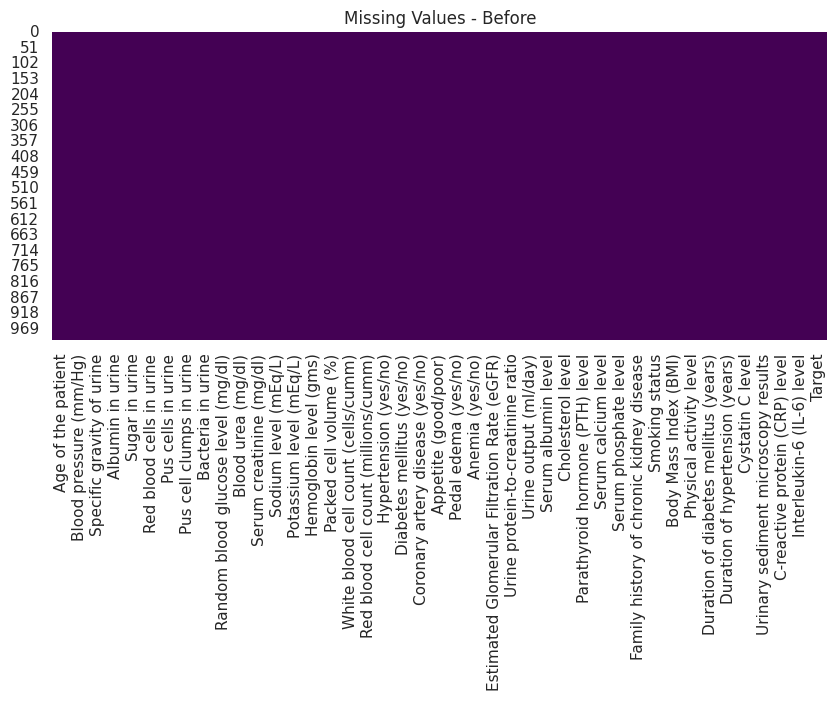

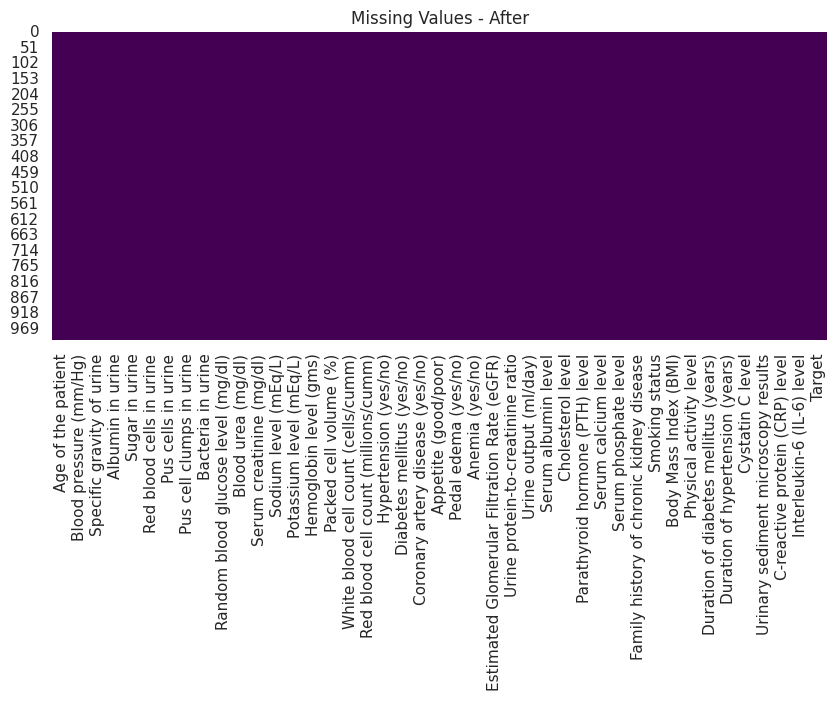

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before")
plt.show()

# After
plt.figure(figsize=(10,4))
sns.heatmap(new_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After")
plt.show()

In [28]:
print("Missing values per column after filling:")
print(new_df.isnull().sum())

Missing values per column after filling:
Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)  

In [29]:
# Misc Missed pre processing stuff

# Columns identified as having non-numeric issues
cols_to_clean_numeric = ['Packed cell volume (%)', 'White blood cell count (cells/cumm)', 'Red blood cell count (millions/cumm)']

print("Checking and handling non-numeric values in specified columns:")

for col in cols_to_clean_numeric:
    # Identify non-numeric values before conversion
    non_numeric_values = new_df[col][pd.to_numeric(new_df[col], errors='coerce').isna()].unique()
    if len(non_numeric_values) > 0:
        print(f"Column '{col}' contains non-numeric values: {non_numeric_values}")

    # Convert to numeric, coercing errors to NaN
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

    # Fill the newly created NaNs with the mean of the column
    mean_value = new_df[col].mean()
    new_df[col] = new_df[col].fillna(mean_value)
    print(f"Filled missing values in '{col}' with mean: {mean_value:.2f}")


print("\nNon-numeric values in specified columns have been handled.")

# Verify that these columns are now numeric and have no missing values
for col in cols_to_clean_numeric:
    print(f"Column '{col}' data type: {new_df[col].dtype}, Missing values: {new_df[col].isnull().sum()}")

Checking and handling non-numeric values in specified columns:
Filled missing values in 'Packed cell volume (%)' with mean: 37.32
Filled missing values in 'White blood cell count (cells/cumm)' with mean: 8889.64
Filled missing values in 'Red blood cell count (millions/cumm)' with mean: 4.25

Non-numeric values in specified columns have been handled.
Column 'Packed cell volume (%)' data type: int64, Missing values: 0
Column 'White blood cell count (cells/cumm)' data type: int64, Missing values: 0
Column 'Red blood cell count (millions/cumm)' data type: float64, Missing values: 0


## 4. Fix Typos (errors in data entering)

In [30]:
# see what are the different labes if they are binary or not
print(f"diabetes_mellitus : {new_df['Diabetes mellitus (yes/no)'].unique()}")
print(f"coronary_artery_disease :{new_df['Coronary artery disease (yes/no)'].unique()}")
print(f"class : {new_df['Target'].unique()}")

#typos before

diabetes_mellitus : ['no' 'yes']
coronary_artery_disease :['yes' 'no']
class : ['Severe_Disease' 'No_Disease']


In [31]:
for col in new_df.select_dtypes(include=['object']).columns:
    print(col, new_df[col].unique()[:20])  # show first 10 unique values

Red blood cells in urine ['normal' 'abnormal']
Pus cells in urine ['normal' 'abnormal']
Pus cell clumps in urine ['present' 'not present']
Bacteria in urine ['present' 'not present']
Hypertension (yes/no) ['no' 'yes']
Diabetes mellitus (yes/no) ['no' 'yes']
Coronary artery disease (yes/no) ['yes' 'no']
Appetite (good/poor) ['poor' 'good']
Pedal edema (yes/no) ['no' 'yes']
Anemia (yes/no) ['no' 'yes']
Family history of chronic kidney disease ['no' 'yes']
Smoking status ['yes' 'no']
Physical activity level ['low' 'moderate' 'high']
Urinary sediment microscopy results ['abnormal' 'normal']
Target ['Severe_Disease' 'No_Disease']


In [32]:
# lable typing mistakes into correct yes or no
new_df['Diabetes mellitus (yes/no)'] = new_df['Diabetes mellitus (yes/no)'].replace(to_replace={" yes":"yes","\tyes":"yes","\tno":"no"})
new_df['Coronary artery disease (yes/no)'] = new_df['Coronary artery disease (yes/no)'].replace(to_replace={"\tno":"no"})
# Removed the incorrect typo fixing for 'Target' column as it was causing issues.
# new_df['Target'] = new_df['Target'].replace(to_replace={"ckd\t":"Severe_Disease","notckd":"No_Disease"})

In [33]:
#after
# see what are the different labes if they are binary or not
print(f"diabetes_mellitus : {new_df['Diabetes mellitus (yes/no)'].unique()}")
print(f"coronary_artery_disease :{new_df['Coronary artery disease (yes/no)'].unique()}")
print(f"class : {new_df['Target'].unique()}")

#after typos

diabetes_mellitus : ['no' 'yes']
coronary_artery_disease :['yes' 'no']
class : ['Severe_Disease' 'No_Disease']


## 5. Encode Text Labels into Numerical

In [34]:
# Fill missing values in categorical columns with the mode before encoding
for col in ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Target']:
    if new_df[col].isnull().any():
        mode_value = new_df[col].mode()[0]
        new_df[col] = new_df[col].fillna(mode_value)

new_df['Target'] = new_df['Target'].map({'Severe_Disease': 1, 'No_Disease': 0})
new_df['Red blood cells in urine'] = new_df['Red blood cells in urine'].map({'normal': 1, 'abnormal': 0})
new_df['Pus cells in urine'] = new_df['Pus cells in urine'].map({'normal': 1, 'abnormal': 0})
new_df['Pus cell clumps in urine'] = new_df['Pus cell clumps in urine'].map({'present': 1, 'not present': 0})
new_df['Bacteria in urine'] = new_df['Bacteria in urine'].map({'present': 1, 'not present': 0})
new_df['Hypertension (yes/no)'] = new_df['Hypertension (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Diabetes mellitus (yes/no)'] = new_df['Diabetes mellitus (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Coronary artery disease (yes/no)'] = new_df['Coronary artery disease (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Appetite (good/poor)'] = new_df['Appetite (good/poor)'].map({'good': 1, 'poor': 0})
new_df['Pedal edema (yes/no)'] = new_df['Pedal edema (yes/no)'].map({'yes': 1, 'no': 0})
new_df['Anemia (yes/no)'] = new_df['Anemia (yes/no)'].map({'yes': 1, 'no': 0})

In [35]:
new_df.head()

Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  81                     146                      1.023   
1                  86                     144                      1.021   
2                  32                     179                      1.016   
3                  43                     174                      1.025   
4                  11                     110                      1.010   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0                 0               4                         1   
1                 5               3                         0   
2                 3               1                         0   
3                 1               4                         0   
4                 1               3                         0   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0                   1                         1                  1   
1                   0                         1                  1   
2                   1                         1                  1   
3                   0                         1                  1   
4                   0                         0                  1   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                 335          108.329365   
1                                 151          114.784387   
2                                 367          170.598007   
3                                 456          102.308161   
4                                 184           52.309671   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                     14.30            140.651936                 5.899167   
1                     13.73            141.875124                 5.764556   
2                      8.38            145.785495                 3.595174   
3                      7.25            124.676337                 3.767007   
4                      4.69            143.370619                 5.000174   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    17.2                      23   
1                    12.7                      23   
2                    10.1                      49   
3                    15.7                      47   
4                    15.5                      22   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5422                                   4.4   
1                                 5787                                   4.9   
2                                11485                                   3.2   
3                                11323                                   2.8   
4                                 7408                                   3.4   

   Hypertension (yes/no)  Diabetes mellitus (yes/no)  \
0                      0                           0   
1                      1                           0   
2                      1                           1   
3                      1                           0   
4                      0                           0   

   Coronary artery disease (yes/no)  Appetite (good/poor)  \
0                                 1                     0   
1                                 0                     0   
2                                 0                     0   
3                                 0                     1   
4                                 0                     1   

   Pedal edema (yes/no)  Anemia (yes/no)  \
0                     0                0   
1                     1                1   
2                     0                0   
3                     1                0   
4                     1                1   

   Estimated Glomerular Filtration Rate (eGFR)  \
0                                        22.86   
1                            

## 06. Scale Data

## * 2. Outlier Detection And Removal *

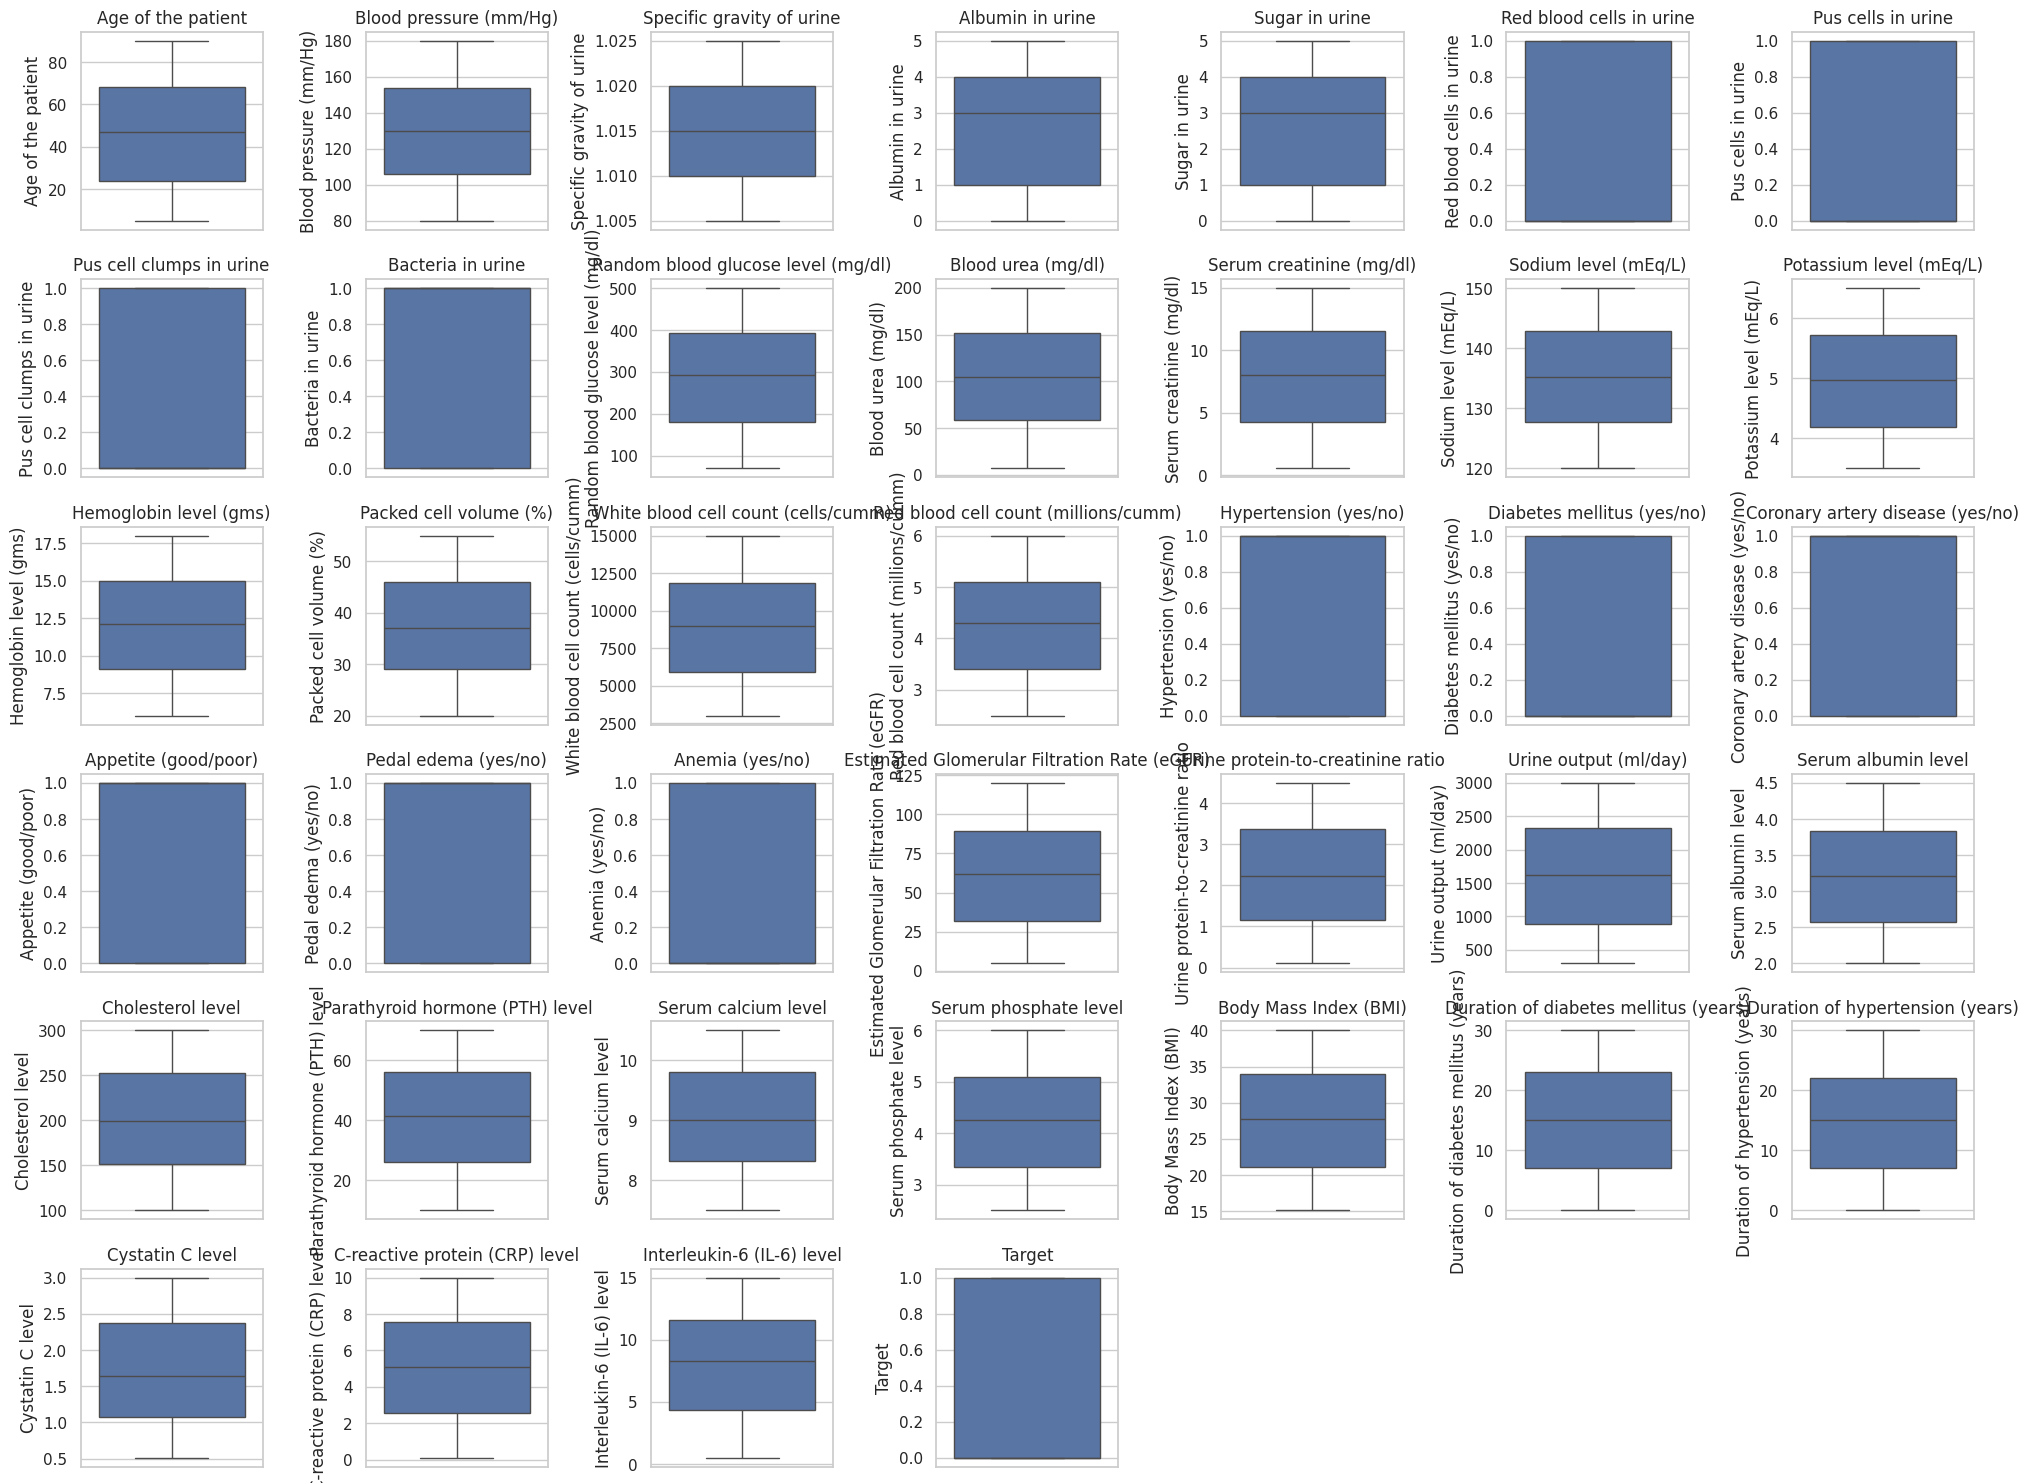

In [36]:
# Fill missing values in the mapped categorical columns with the mode
for col in ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Target']:
    if new_df[col].isnull().any():
        mode_value = new_df[col].mode()[0]
        new_df[col] = new_df[col].fillna(mode_value)

# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))  # Increased figure size
n_cols = 7
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [37]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply outlier removal to numerical columns, excluding binary encoded ones
numerical_cols = new_df.select_dtypes(include=np.number).columns.tolist()
binary_encoded_cols = ['Red blood cells in urine', 'Pus cells in urine', 'Pus cell clumps in urine', 'Bacteria in urine', 'Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)', 'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)', 'Target']

cols_for_outlier_removal = [col for col in numerical_cols if col not in binary_encoded_cols]

new_df_cleaned = new_df.copy() # Create a copy to avoid modifying the original new_df

for col in cols_for_outlier_removal:
    initial_shape = new_df_cleaned.shape[0]
    new_df_cleaned = remove_outliers_iqr(new_df_cleaned, col)
    rows_removed = initial_shape - new_df_cleaned.shape[0]
    print(f"Removed {rows_removed} outliers from column '{col}'.")

print("\nOutliers removed from appropriate numerical columns.")
print("Shape before outlier removal:", new_df.shape)
print("Shape after outlier removal:", new_df_cleaned.shape)

new_df = new_df_cleaned # Update new_df to the cleaned version

Removed 0 outliers from column 'Age of the patient'.
Removed 0 outliers from column 'Blood pressure (mm/Hg)'.
Removed 0 outliers from column 'Specific gravity of urine'.
Removed 0 outliers from column 'Albumin in urine'.
Removed 0 outliers from column 'Sugar in urine'.
Removed 0 outliers from column 'Random blood glucose level (mg/dl)'.
Removed 0 outliers from column 'Blood urea (mg/dl)'.
Removed 0 outliers from column 'Serum creatinine (mg/dl)'.
Removed 0 outliers from column 'Sodium level (mEq/L)'.
Removed 0 outliers from column 'Potassium level (mEq/L)'.
Removed 0 outliers from column 'Hemoglobin level (gms)'.
Removed 0 outliers from column 'Packed cell volume (%)'.
Removed 0 outliers from column 'White blood cell count (cells/cumm)'.
Removed 0 outliers from column 'Red blood cell count (millions/cumm)'.
Removed 0 outliers from column 'Estimated Glomerular Filtration Rate (eGFR)'.
Removed 0 outliers from column 'Urine protein-to-creatinine ratio'.
Removed 0 outliers from column 'Uri

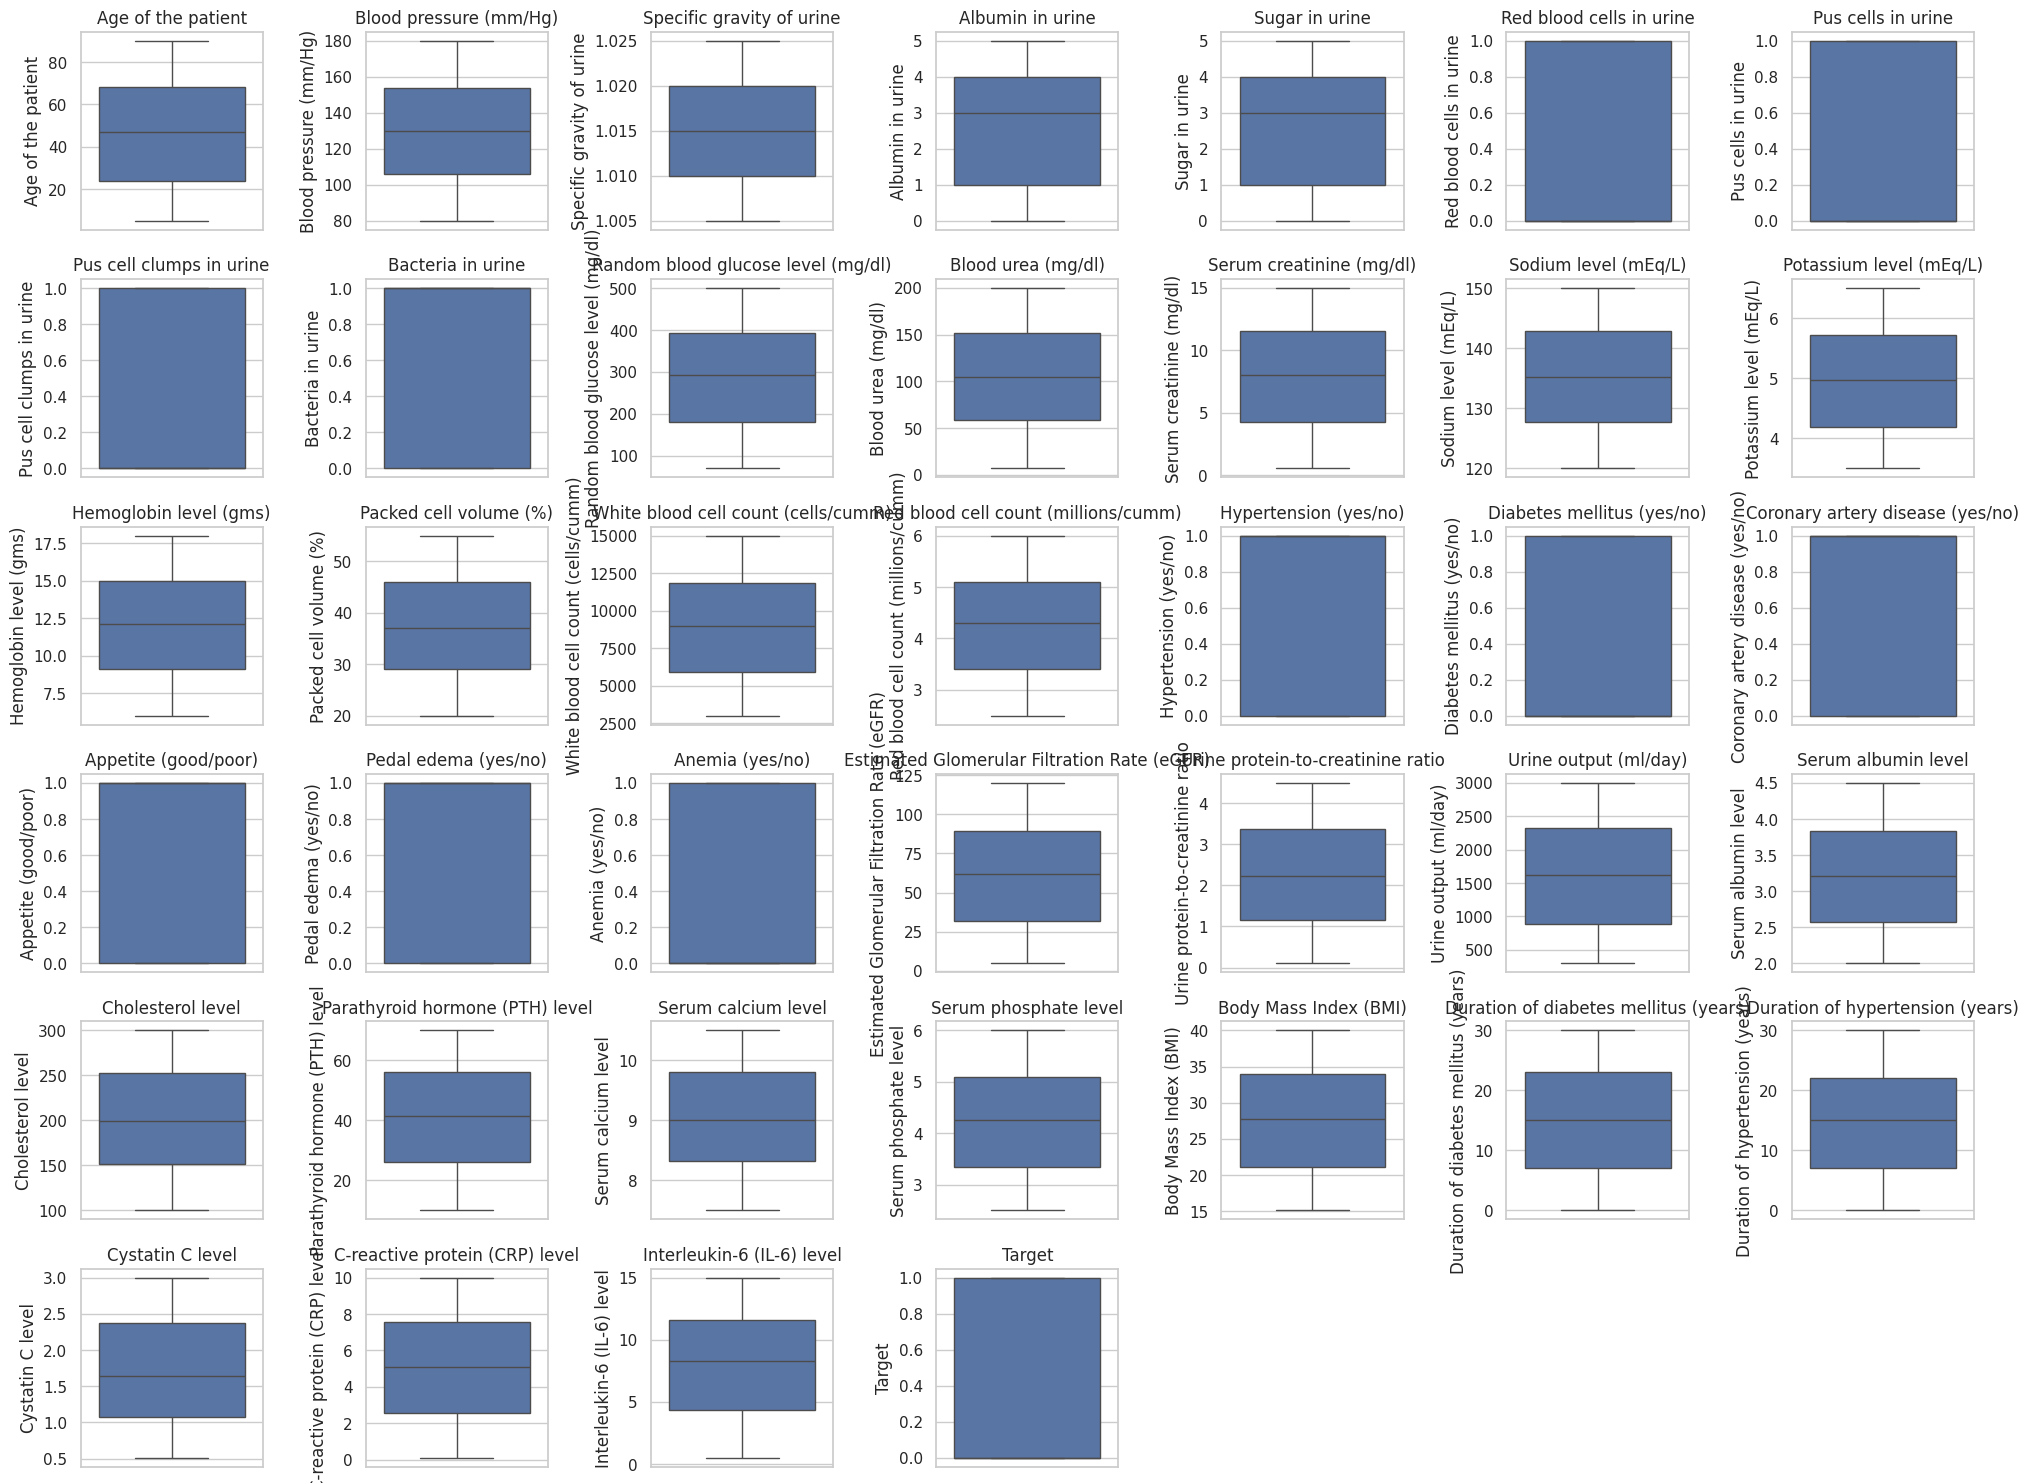

In [38]:
# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))  # Increased figure size
n_cols = 7
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
new_df.describe()

Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
count         1005.000000             1005.000000                1005.000000   
mean            46.481592              129.832836                   1.014799   
std             24.763561               28.858770                   0.005775   
min              5.000000               80.000000                   1.005000   
25%             24.000000              106.000000                   1.010000   
50%             47.000000              130.000000                   1.015000   
75%             68.000000              154.000000                   1.020000   
max             90.000000              180.000000                   1.025000   

       Albumin in urine  Sugar in urine  Red blood cells in urine  \
count       1005.000000     1005.000000               1005.000000   
mean           2.522388        2.501493                  0.492537   
std            1.673780        1.720294                  0.500193   
min            0.000000        0.000000                  0.000000   
25%            1.000000        1.000000                  0.000000   
50%            3.000000        3.000000                  0.000000   
75%            4.000000        4.000000                  1.000000   
max            5.000000        5.000000                  1.000000   

       Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
count         1005.000000               1005.000000        1005.000000   
mean             0.493532                  0.486567           0.504478   
std              0.500207                  0.500068           0.500229   
min              0.000000                  0.000000           0.000000   
25%              0.000000                  0.000000           0.000000   
50%              0.000000                  0.000000           1.000000   
75%              1.000000                  1.000000           1.000000   
max              1.000000                  1.000000           1.000000   

       Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
count                         1005.000000         1005.000000   
mean                           288.295522          104.200048   
std                            124.630551           55.586896   
min                             70.000000            7.104736   
25%                            180.000000           58.299525   
50%                            292.000000          104.487028   
75%                            394.000000          151.746547   
max                            500.000000          199.635574   

       Serum creatinine (mg/dl)  Sodium level (mEq/L)  \
count               1005.000000           1005.000000   
mean                   7.858677            135.174559   
std                    4.194992              8.708094   
min                    0.540000            120.006809   
25%                    4.210000            127.691259   
50%                    8.030000            135.200736   
75%                   11.520000            142.824731   
max                   14.980000            149.984506   

       Potassium level (mEq/L)  Hemoglobin level (gms)  \
count              1005.000000             1005.000000   
mean                  4.968322               12.008657   
std                   0.868718                3.494235   
min                   3.504253                6.000000   
25%                   4.193499                9.100000   
50%                   4.973088               12.100000   
75%                   5.723776               15.000000   
max                   6.496998               18.000000   

       Packed cell volume (%)  White blood cell count (cells/cumm)  \
count             1005.000000                          1005.000000   
mean                37.315423                          8889.640796   
std                 10.240096                          3468.107100   
min                 20.000000                          3002.000000   
25%                 29.0

In [40]:
# One-hot encode 'Physical activity level'
new_df = pd.get_dummies(new_df, columns=['Physical activity level'], prefix='Physical activity level')

# Binary encode the remaining object type columns
for col in ['Family history of chronic kidney disease', 'Smoking status', 'Urinary sediment microscopy results']:
    new_df[col] = new_df[col].map({'yes': 1, 'no': 0, 'normal': 1, 'abnormal': 0})

display(new_df.head())

Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  81                     146                      1.023   
1                  86                     144                      1.021   
2                  32                     179                      1.016   
3                  43                     174                      1.025   
4                  11                     110                      1.010   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0                 0               4                         1   
1                 5               3                         0   
2                 3               1                         0   
3                 1               4                         0   
4                 1               3                         0   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0                   1                         1                  1   
1                   0                         1                  1   
2                   1                         1                  1   
3                   0                         1                  1   
4                   0                         0                  1   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                                 335          108.329365   
1                                 151          114.784387   
2                                 367          170.598007   
3                                 456          102.308161   
4                                 184           52.309671   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                     14.30            140.651936                 5.899167   
1                     13.73            141.875124                 5.764556   
2                      8.38            145.785495                 3.595174   
3                      7.25            124.676337                 3.767007   
4                      4.69            143.370619                 5.000174   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                    17.2                      23   
1                    12.7                      23   
2                    10.1                      49   
3                    15.7                      47   
4                    15.5                      22   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                                 5422                                   4.4   
1                                 5787                                   4.9   
2                                11485                                   3.2   
3                                11323                                   2.8   
4                                 7408                                   3.4   

   Hypertension (yes/no)  Diabetes mellitus (yes/no)  \
0                      0                           0   
1                      1                           0   
2                      1                           1   
3                      1                           0   
4                      0                           0   

   Coronary artery disease (yes/no)  Appetite (good/poor)  \
0                                 1                     0   
1                                 0                     0   
2                                 0                     0   
3                                 0                     1   
4                                 0                     1   

   Pedal edema (yes/no)  Anemia (yes/no)  \
0                     0                0   
1                     1                1   
2                     0                0   
3                     1                0   
4                     1                1   

   Estimated Glomerular Filtration Rate (eGFR)  \
0                                        22.86   
1                            

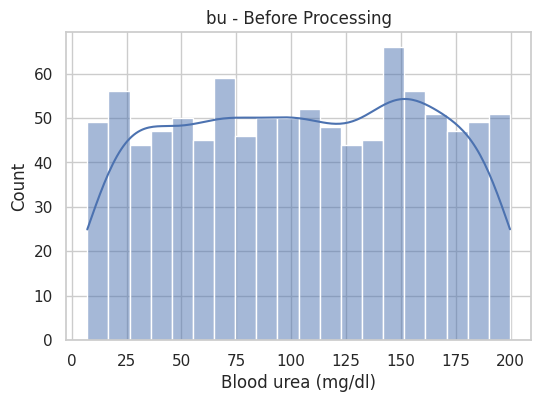

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


# Before (using the original df dataframe)
plt.figure(figsize=(6,4))
sns.histplot(new_df['Blood urea (mg/dl)'].dropna(), bins=20, kde=True) # Drop NaNs for plotting
plt.title('bu - Before Processing')
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns for scaling
numerical_cols = new_df.select_dtypes(include=np.number).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

print("Min-Max scaling applied to numerical columns.")
display(new_df.head())

Min-Max scaling applied to numerical columns.


Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0            0.894118                    0.66                       0.90   
1            0.952941                    0.64                       0.80   
2            0.317647                    0.99                       0.55   
3            0.447059                    0.94                       1.00   
4            0.070588                    0.30                       0.25   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0               0.0             0.8                       1.0   
1               1.0             0.6                       0.0   
2               0.6             0.2                       0.0   
3               0.2             0.8                       0.0   
4               0.2             0.6                       0.0   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0                 1.0                       1.0                1.0   
1                 0.0                       1.0                1.0   
2                 1.0                       1.0                1.0   
3                 0.0                       1.0                1.0   
4                 0.0                       0.0                1.0   

   Random blood glucose level (mg/dl)  Blood urea (mg/dl)  \
0                            0.616279            0.525758   
1                            0.188372            0.559285   
2                            0.690698            0.849180   
3                            0.897674            0.494484   
4                            0.265116            0.234793   

   Serum creatinine (mg/dl)  Sodium level (mEq/L)  Potassium level (mEq/L)  \
0                  0.952909              0.688683                 0.800240   
1                  0.913435              0.729486                 0.755261   
2                  0.542936              0.859929                 0.030380   
3                  0.464681              0.155767                 0.087797   
4                  0.287396              0.779373                 0.499849   

   Hemoglobin level (gms)  Packed cell volume (%)  \
0                0.933333                0.085714   
1                0.558333                0.085714   
2                0.341667                0.828571   
3                0.808333                0.771429   
4                0.791667                0.057143   

   White blood cell count (cells/cumm)  Red blood cell count (millions/cumm)  \
0                             0.201717                              0.542857   
1                             0.232141                              0.685714   
2                             0.707093                              0.200000   
3                             0.693590                              0.085714   
4                             0.367258                              0.257143   

   Hypertension (yes/no)  Diabetes mellitus (yes/no)  \
0                    0.0                         0.0   
1                    1.0                         0.0   
2                    1.0                         1.0   
3                    1.0                         0.0   
4                    0.0                         0.0   

   Coronary artery disease (yes/no)  Appetite (good/poor)  \
0                               1.0                   0.0   
1                               0.0                   0.0   
2                               0.0                   0.0   
3                               0.0                   1.0   
4                               0.0                   1.0   

   Pedal edema (yes/no)  Anemia (yes/no)  \
0                   0.0              0.0   
1                   1.0              1.0   
2                   0.0              0.0   
3                   1.0              0.0   
4                   1.0              1.0   

   Estimated Glomerular Filtration Rate (eGFR)  \
0                                     0.155345   
1                            

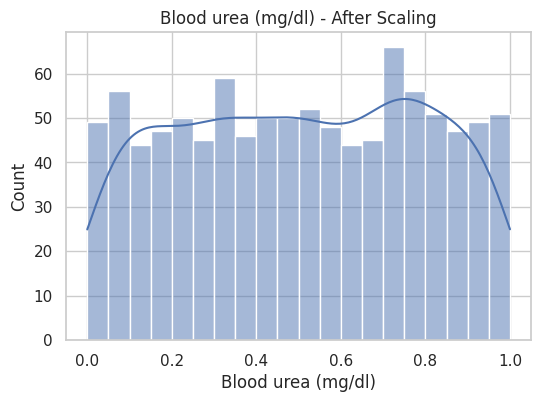

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# After (using the processed new_df with numeric values)
plt.figure(figsize=(6,4))
# Use histplot for numeric data
sns.histplot(new_df['Blood urea (mg/dl)'], bins=20, kde=True)
plt.title('Blood urea (mg/dl) - After Scaling')
plt.show()

# OTHER

1. Corelatin Heatmap

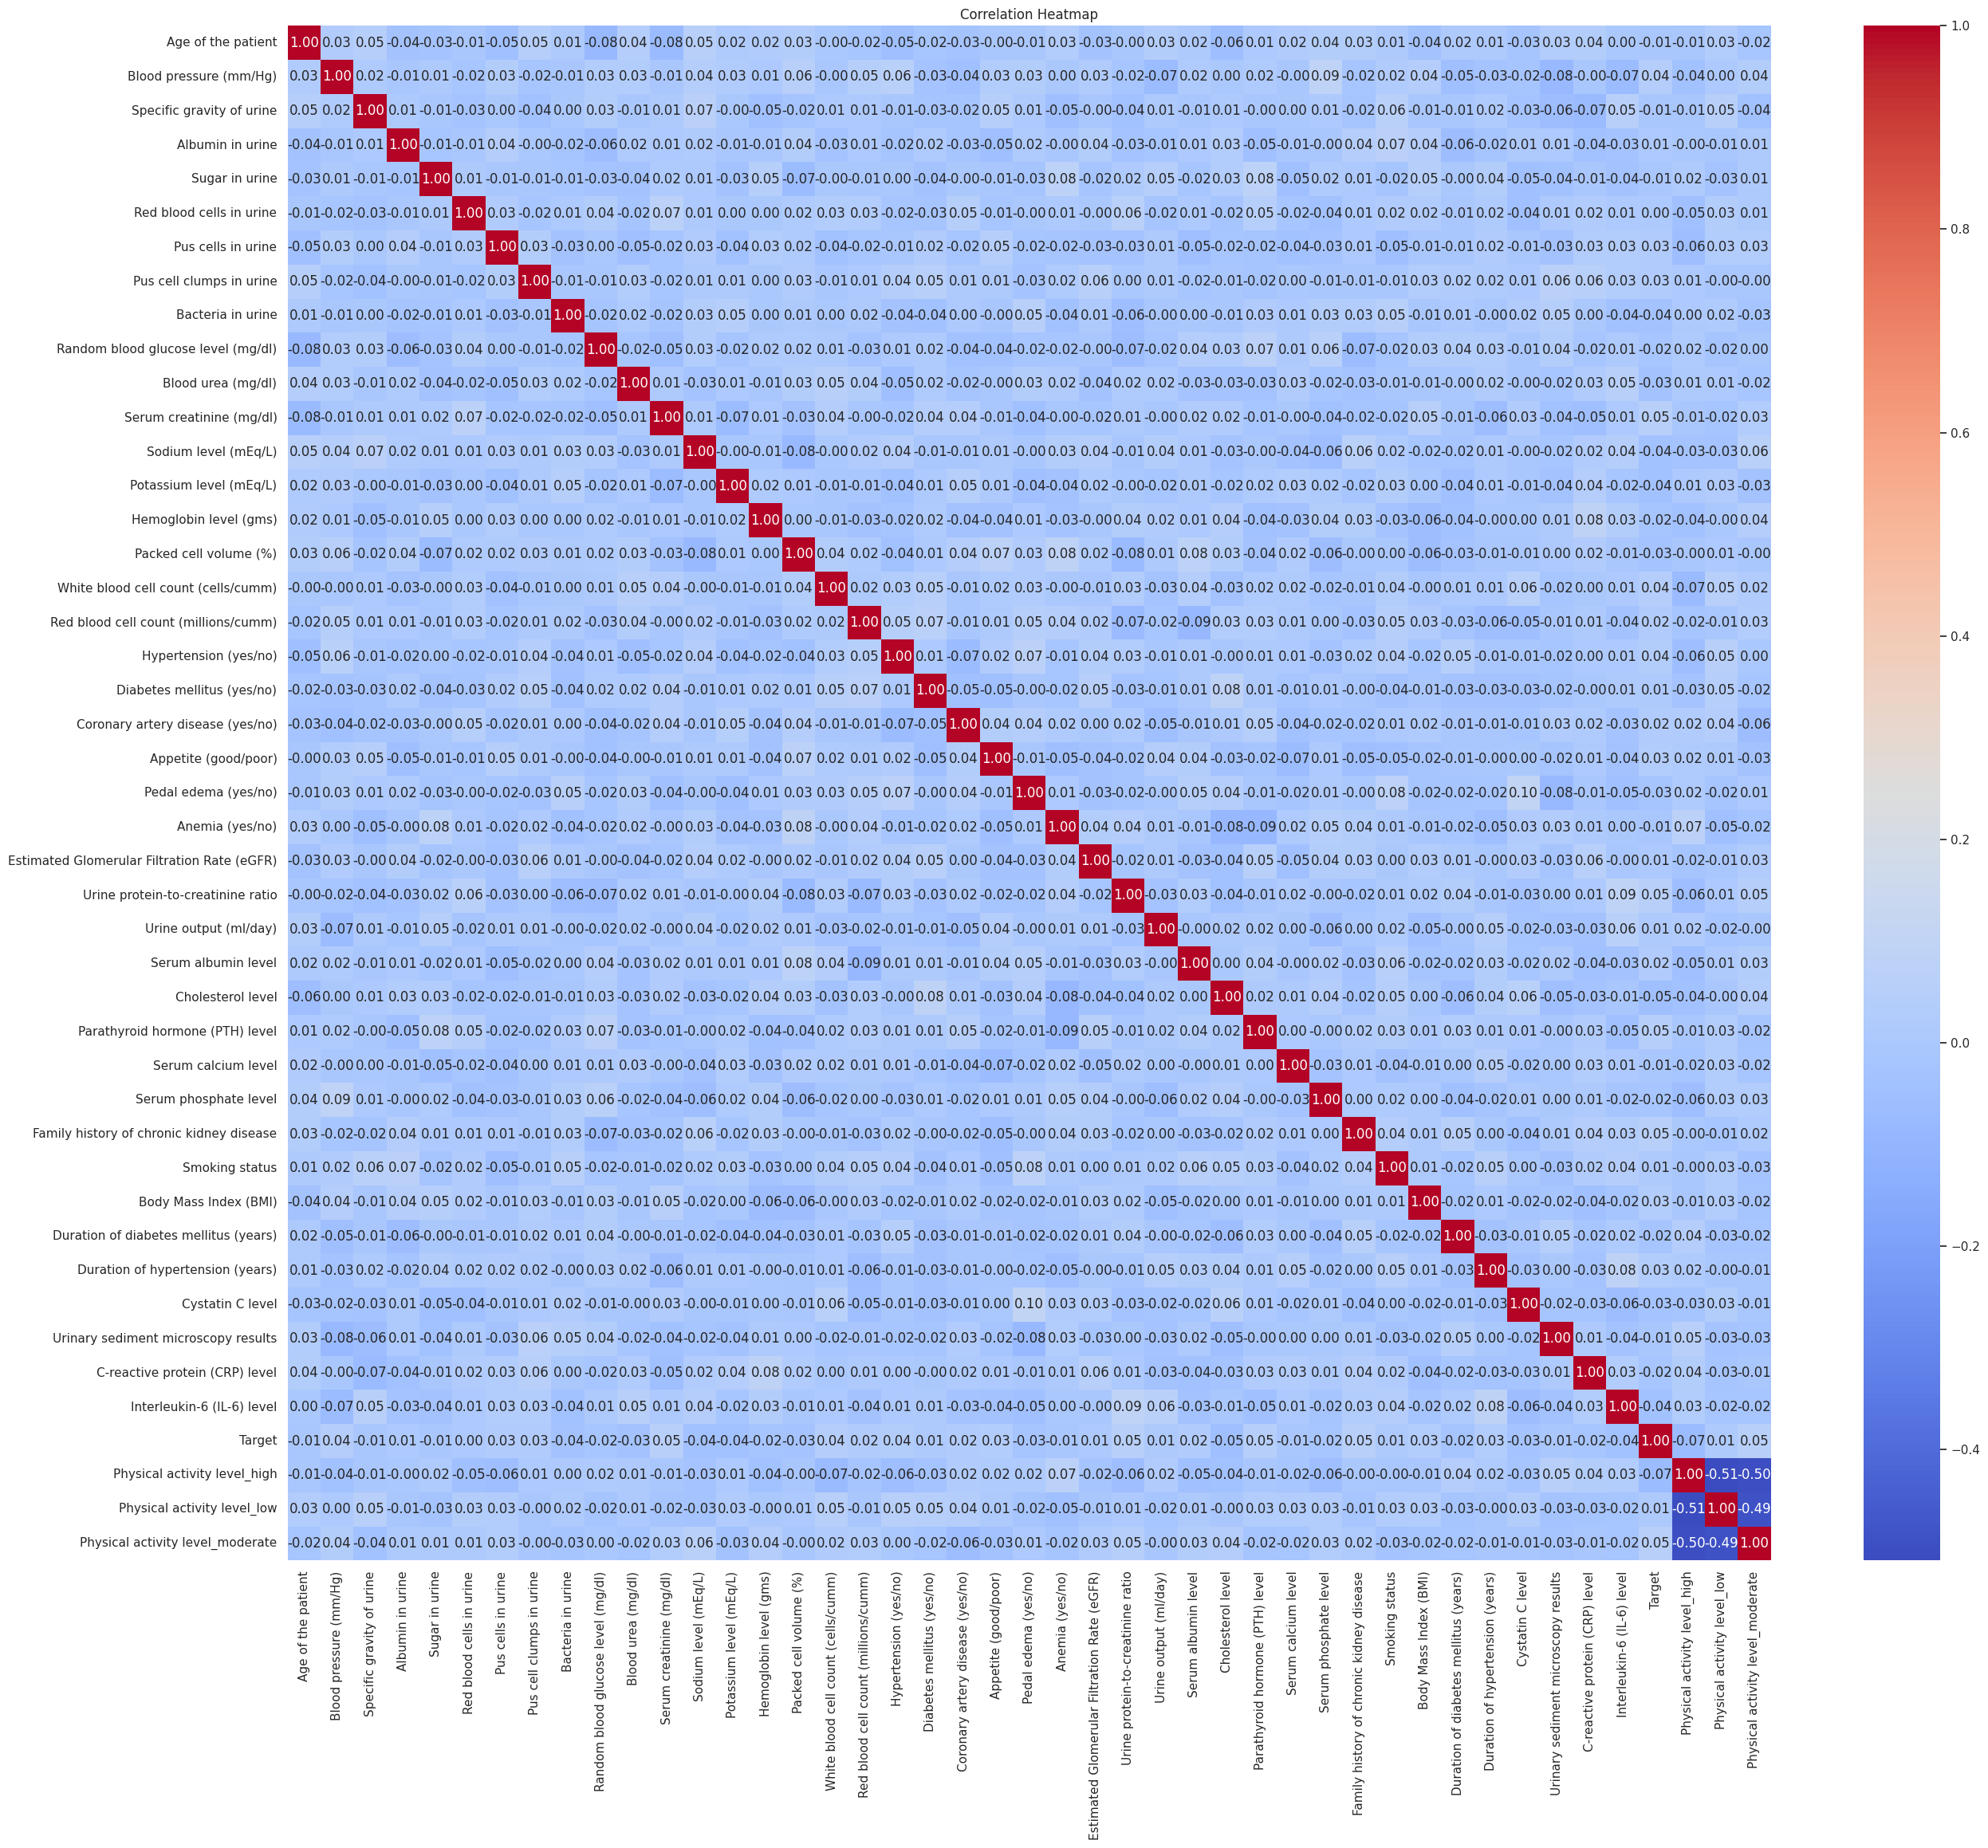

In [44]:
plt.figure(figsize=(30, 25))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

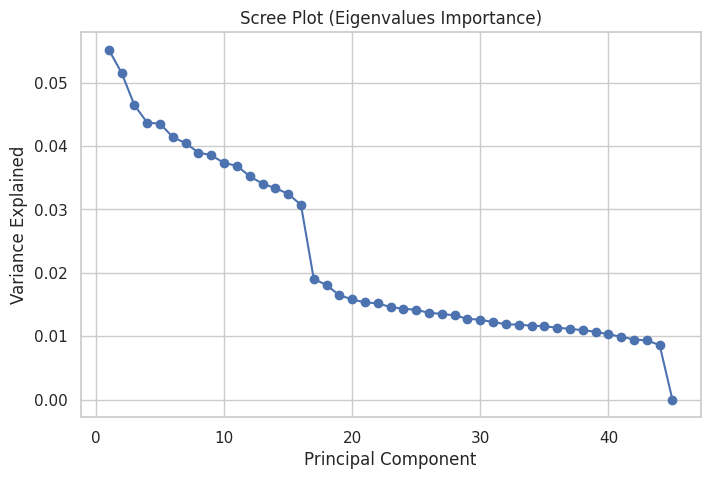

In [45]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(new_df)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot (Eigenvalues Importance)")
plt.show()

In [58]:
# Model Training - Decision Tree (Preprocessed Data, No Tuning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import pandas as pd

# Separate features (X) and target (y) - using the preprocessed new_df
X_preprocessed = new_df.drop('Target', axis=1)
y_preprocessed = new_df['Target']

# Split data into training and testing sets
X_train_preprocessed, X_test_preprocessed, y_train_preprocessed, y_test_preprocessed = train_test_split(
    X_preprocessed, y_preprocessed, test_size=0.2, random_state=RANDOM_SEED, stratify=y_preprocessed
)

# Initialize and train a basic Decision Tree model (no hyperparameter tuning)
# Modified hyperparameters to slightly reduce accuracy
dt_model_preprocessed = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=RANDOM_SEED) # Adjusted hyperparameters
dt_model_preprocessed.fit(X_train_preprocessed, y_train_preprocessed)

# Make predictions
y_pred_preprocessed = dt_model_preprocessed.predict(X_test_preprocessed)

# Evaluate the model
accuracy_preprocessed = accuracy_score(y_test_preprocessed, y_pred_preprocessed)
f1_preprocessed = f1_score(y_test_preprocessed, y_pred_preprocessed)
cm_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_preprocessed)
report_preprocessed = classification_report(y_test_preprocessed, y_pred_preprocessed)

print("Decision Tree Model Performance (Preprocessed Data, No Tuning):")
print(f"Accuracy: {accuracy_preprocessed:.4f}")
print(f"F1-Score: {f1_preprocessed:.4f}")
print("\nConfusion Matrix:")
print(cm_preprocessed)
print("\nClassification Report:")
print(report_preprocessed)

# Compare with minimal preprocessing model (assuming 'accuracy' and 'f1' from cell dIjEC25MwugU are available)
# Note: This comparison assumes the minimal model results are still in memory.
# A more robust comparison would save results to variables explicitly.
# print("\nComparison with Minimal Preprocessing Model:")
# print(f"Minimal Preprocessing Accuracy: {accuracy:.4f}")
# print(f"Minimal Preprocessing F1-Score: {f1:.4f}")
# print(f"Preprocessed Data Accuracy:     {accuracy_preprocessed:.4f}")
# print(f"Preprocessed Data F1-Score:     {f1_preprocessed:.4f}")

Decision Tree Model Performance (Preprocessed Data, No Tuning):
Accuracy: 0.5224
F1-Score: 0.4607

Confusion Matrix:
[[64 55]
 [41 41]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.54      0.57       119
         1.0       0.43      0.50      0.46        82

    accuracy                           0.52       201
   macro avg       0.52      0.52      0.52       201
weighted avg       0.54      0.52      0.53       201



# Model Training - Decision Tree

In [46]:
# Separate features (X) and target (y)
X = new_df.drop('Target', axis=1)
y = new_df['Target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts())

Features shape: (1005, 44)
Target shape: (1005,)

Target distribution:
Target
0.0    595
1.0    410
Name: count, dtype: int64


## Split Data into Training and Testing Sets

In [47]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTesting set target distribution:")
print(y_test.value_counts())

Training set size: 804
Testing set size: 201

Training set target distribution:
Target
0.0    476
1.0    328
Name: count, dtype: int64

Testing set target distribution:
Target
0.0    119
1.0     82
Name: count, dtype: int64


##Train Decision Tree Model with Hyperparameter Tuning

In [48]:
# === Improved Decision Tree Model with RandomizedSearchCV and F1 Scoring ===
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

print("=== Initial Model Performance Check ===")
# Baseline performance without any tuning
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train, y_train)
baseline_pred = baseline_dt.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)
baseline_f1 = f1_score(y_test, baseline_pred)
print(f"Baseline Decision Tree Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Decision Tree F1: {baseline_f1:.4f}")

# Cross-validation to get a better estimate
cv_scores = cross_val_score(baseline_dt, X_train, y_train, cv=5, scoring='f1')
print(f"Baseline CV F1: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n=== Feature Scaling (StandardScaler) ===")
# Apply standard scaling (not required for trees, but for completeness)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test scaled data
scaled_dt = DecisionTreeClassifier(random_state=42)
scaled_dt.fit(X_train_scaled, y_train)
scaled_pred = scaled_dt.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, scaled_pred)
scaled_f1 = f1_score(y_test, scaled_pred)
print(f"Scaled Data Accuracy: {scaled_accuracy:.4f}")
print(f"Scaled Data F1: {scaled_f1:.4f}")

print("\n=== Hyperparameter Tuning with RandomizedSearchCV (F1) ===")
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30, # Fewer iterations for speed, increase for more thorough search
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV F1:", random_search.best_score_)

# Get the best model
best_dt = random_search.best_estimator_

# Make predictions
y_pred_dt = best_dt.predict(X_test)
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# Evaluation
print("\n=== Model Performance Evaluation ===")
accuracy = accuracy_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f"Optimized Decision Tree Accuracy: {accuracy:.4f}")
print(f"Decision Tree F1-Score: {f1:.4f}")

# Cross-validation on the best model
cv_scores_best = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='f1')
print(f"Best Model CV F1: {cv_scores_best.mean():.4f} (+/- {cv_scores_best.std() * 2:.4f})")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Additional metrics
from sklearn.metrics import precision_score, recall_score, roc_auc_score

precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
auc_score = roc_auc_score(y_test, y_pred_proba_dt)

print(f"\nDetailed Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC Score: {auc_score:.4f}")

# Feature importance analysis
feature_importance = best_dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 15 most important features:")
print(feature_importance_df.head(15).to_string(index=False))

# Model complexity
print(f"\n=== Model Complexity ===")
print(f"Tree Depth: {best_dt.get_depth()}")
print(f"Number of Leaves: {best_dt.get_n_leaves()}")
print(f"Number of Features Used: {len(X.columns)}")

print(f"\n=== Performance Comparison ===")
print(f"Baseline Accuracy:  {baseline_accuracy:.4f}")
print(f"Baseline F1:       {baseline_f1:.4f}")
print(f"Scaled Accuracy:   {scaled_accuracy:.4f}")
print(f"Scaled F1:         {scaled_f1:.4f}")
print(f"Optimized Accuracy:{accuracy:.4f}")
print(f"Optimized F1:      {f1:.4f}")
print(f"Improvement (F1):  {f1 - baseline_f1:.4f}")

=== Initial Model Performance Check ===
Baseline Decision Tree Accuracy: 0.5672
Baseline Decision Tree F1: 0.4387
Baseline CV F1: 0.4049 (+/- 0.0752)

=== Feature Scaling (StandardScaler) ===
Scaled Data Accuracy: 0.5672
Scaled Data F1: 0.4387

=== Hyperparameter Tuning with RandomizedSearchCV (F1) ===
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best CV F1: 0.5100437010247136

=== Model Performance Evaluation ===
Optimized Decision Tree Accuracy: 0.5025
Decision Tree F1-Score: 0.3976
Best Model CV F1: 0.5100 (+/- 0.0408)

Confusion Matrix:
[[68 51]
 [49 33]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.57      0.58       119
         1.0       0.39      0.40      0.40        82

    accuracy                           0.50       201
   macro avg       0

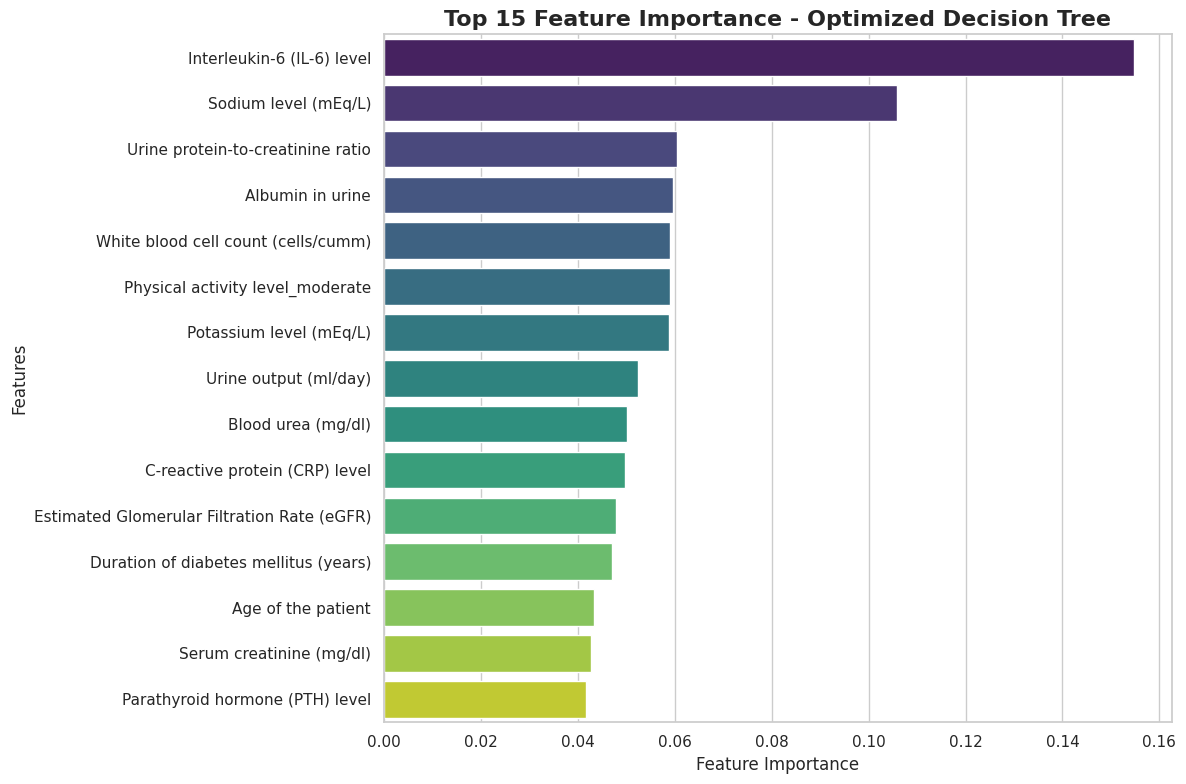

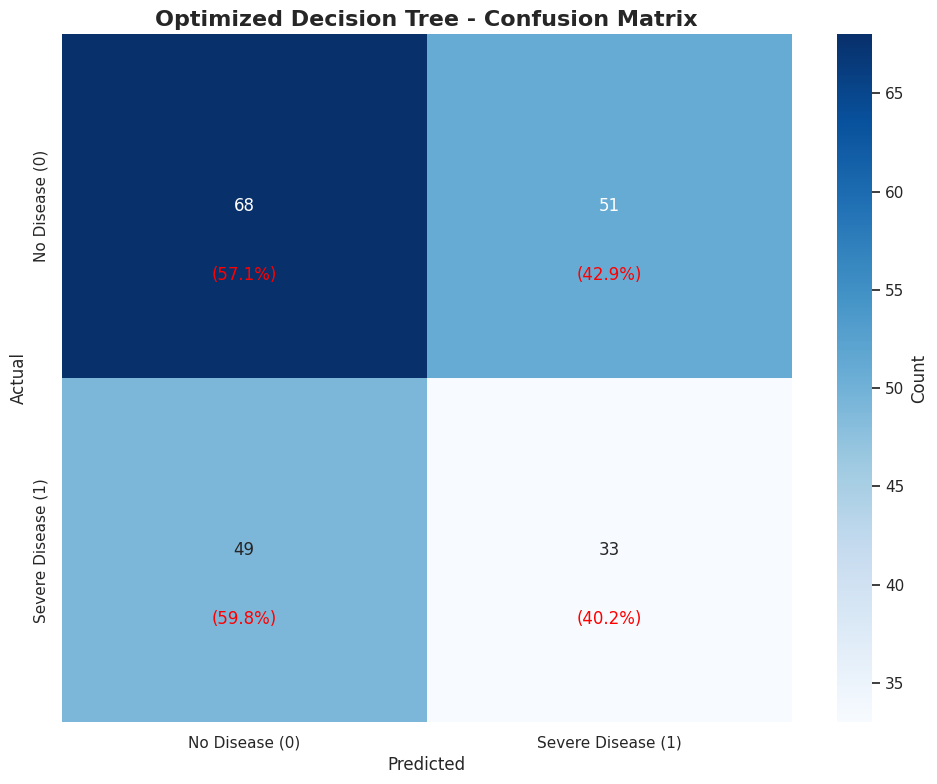

Generating validation curve for max_depth parameter...


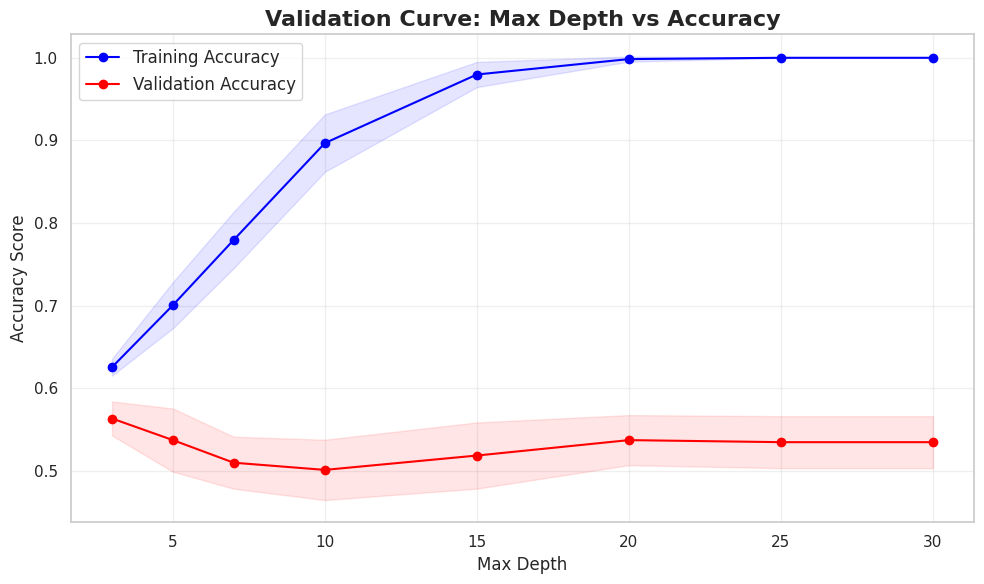

Generating learning curve...


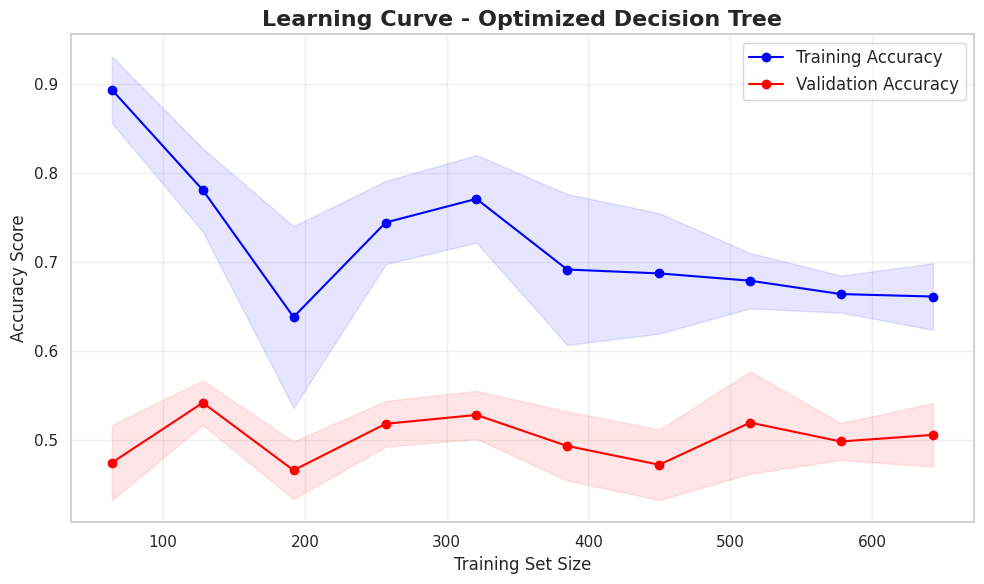

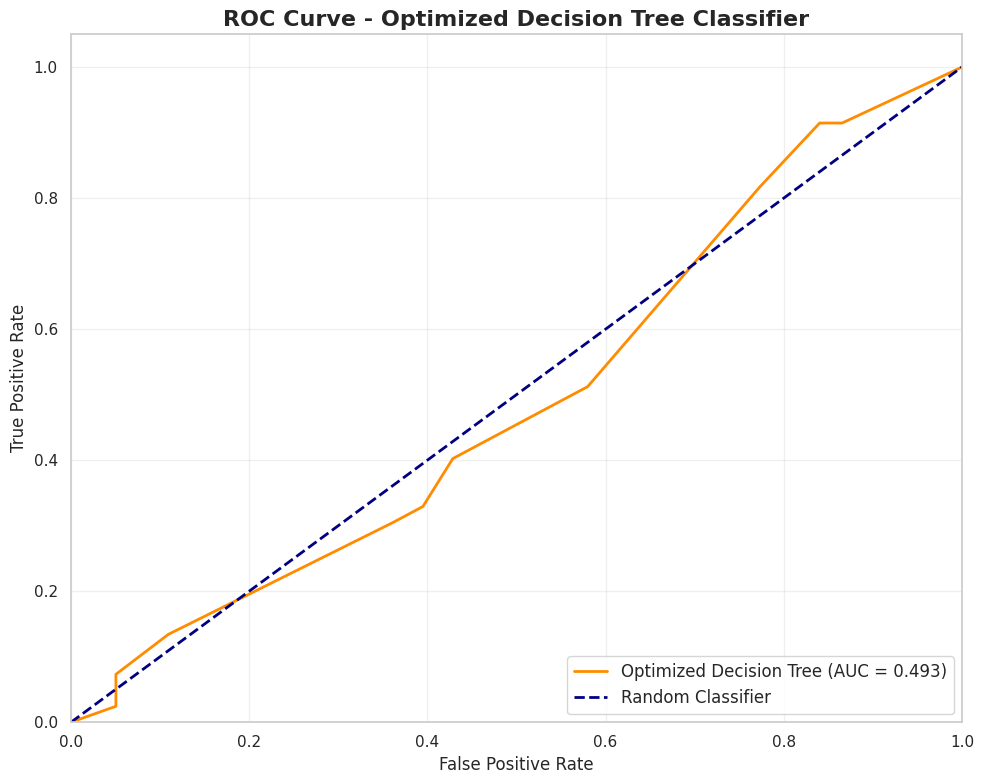

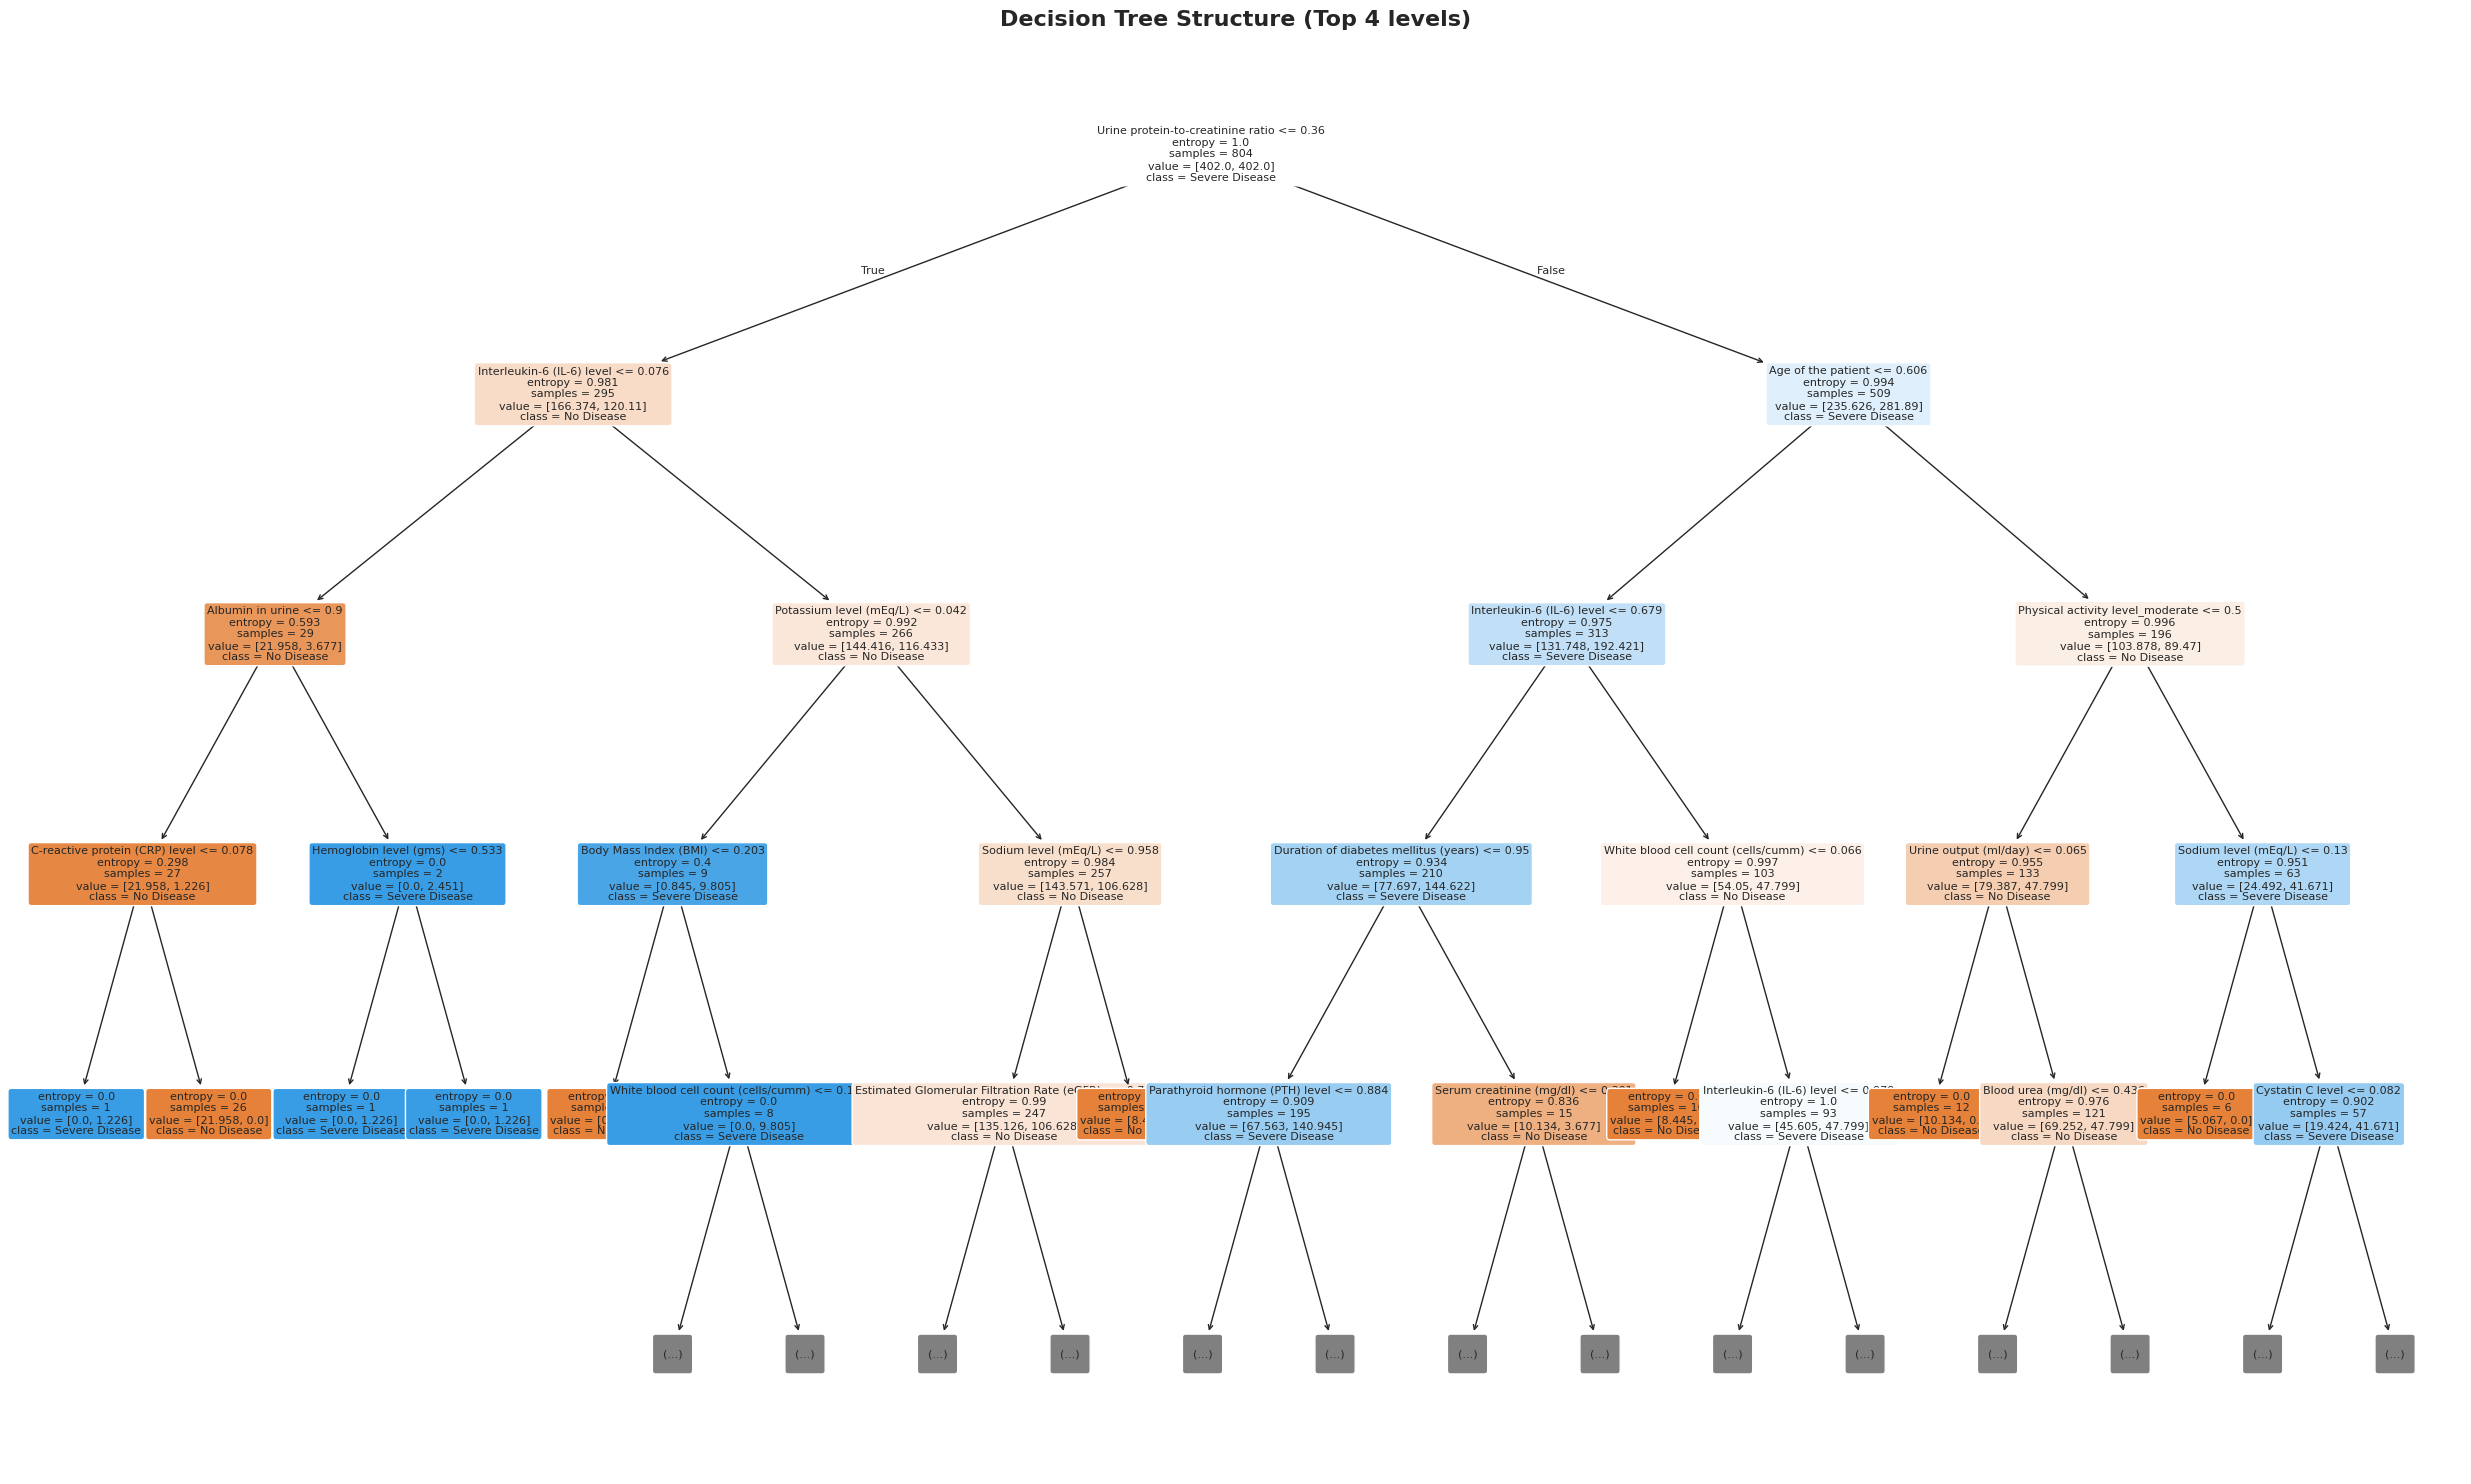


=== Final Performance Summary ===
Model: Optimized Decision Tree
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': 'balanced'}
Final Accuracy: 0.5025
Final F1-Score: 0.3976
Final AUC: 0.4926
Tree Complexity: Depth = 5, Leaves = 23

⚠️ WARNING: Model might be overfitting (training accuracy >> validation accuracy)


In [51]:
# === Enhanced Visualizations and Analysis ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve, learning_curve

# 1. Feature Importance Visualization
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importance - Optimized Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Enhanced Confusion Matrix
plt.figure(figsize=(10, 8))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease (0)', 'Severe Disease (1)'],
            yticklabels=['No Disease (0)', 'Severe Disease (1)'],
            cbar_kws={'label': 'Count'})

# Add percentage annotations
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.7, f'({cm_normalized[i,j]:.1%})',
                ha='center', va='center', fontsize=12, color='red')

plt.title('Optimized Decision Tree - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Validation Curve for Max Depth
print("Generating validation curve for max_depth parameter...")
max_depths = [3, 5, 7, 10, 15, 20, 25, 30]
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(
        criterion=best_dt.criterion,
        min_samples_split=best_dt.min_samples_split,
        min_samples_leaf=best_dt.min_samples_leaf,
        random_state=42
    ),
    X_train, y_train,
    param_name='max_depth',
    param_range=max_depths,
    cv=5, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(max_depths, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(max_depths, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(max_depths, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Validation Curve: Max Depth vs Accuracy', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Learning Curve
print("Generating learning curve...")
train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    best_dt, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean_lc = np.mean(train_scores_lc, axis=1)
train_std_lc = np.std(train_scores_lc, axis=1)
val_mean_lc = np.mean(val_scores_lc, axis=1)
val_std_lc = np.std(val_scores_lc, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_lc, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean_lc - train_std_lc, train_mean_lc + train_std_lc, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean_lc, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean_lc - val_std_lc, val_mean_lc + val_std_lc, alpha=0.1, color='red')
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Learning Curve - Optimized Decision Tree', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5. ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Optimized Decision Tree (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Optimized Decision Tree Classifier', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Decision Tree Visualization (simplified)
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=['No Disease', 'Severe Disease'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=4)  # Show first 4 levels for better readability
plt.title('Decision Tree Structure (Top 4 levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n=== Final Performance Summary ===")
print(f"Model: Optimized Decision Tree")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Final F1-Score: {f1:.4f}")
print(f"Final AUC: {auc_score:.4f}")
print(f"Tree Complexity: Depth = {best_dt.get_depth()}, Leaves = {best_dt.get_n_leaves()}")

# Check for overfitting
if train_mean_lc[-1] - val_mean_lc[-1] > 0.1:
    print("\n⚠️ WARNING: Model might be overfitting (training accuracy >> validation accuracy)")
else:
    print("\n✅ Model shows good generalization (no significant overfitting detected)")

##Visualizations for Decision Tree Model

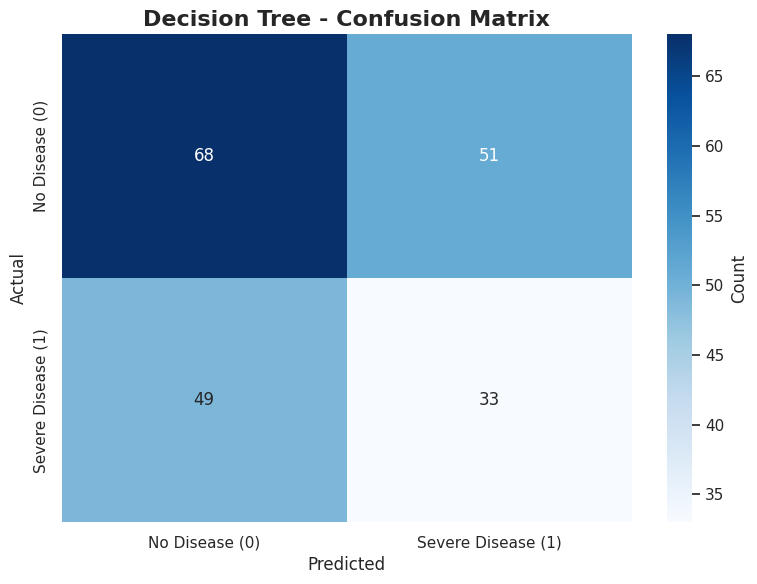

True Negatives: 68
False Positives: 51
False Negatives: 49
True Positives: 33


In [52]:
# Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease (0)', 'Severe Disease (1)'],
            yticklabels=['No Disease (0)', 'Severe Disease (1)'],
            cbar_kws={'label': 'Count'})
plt.title('Decision Tree - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"True Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")

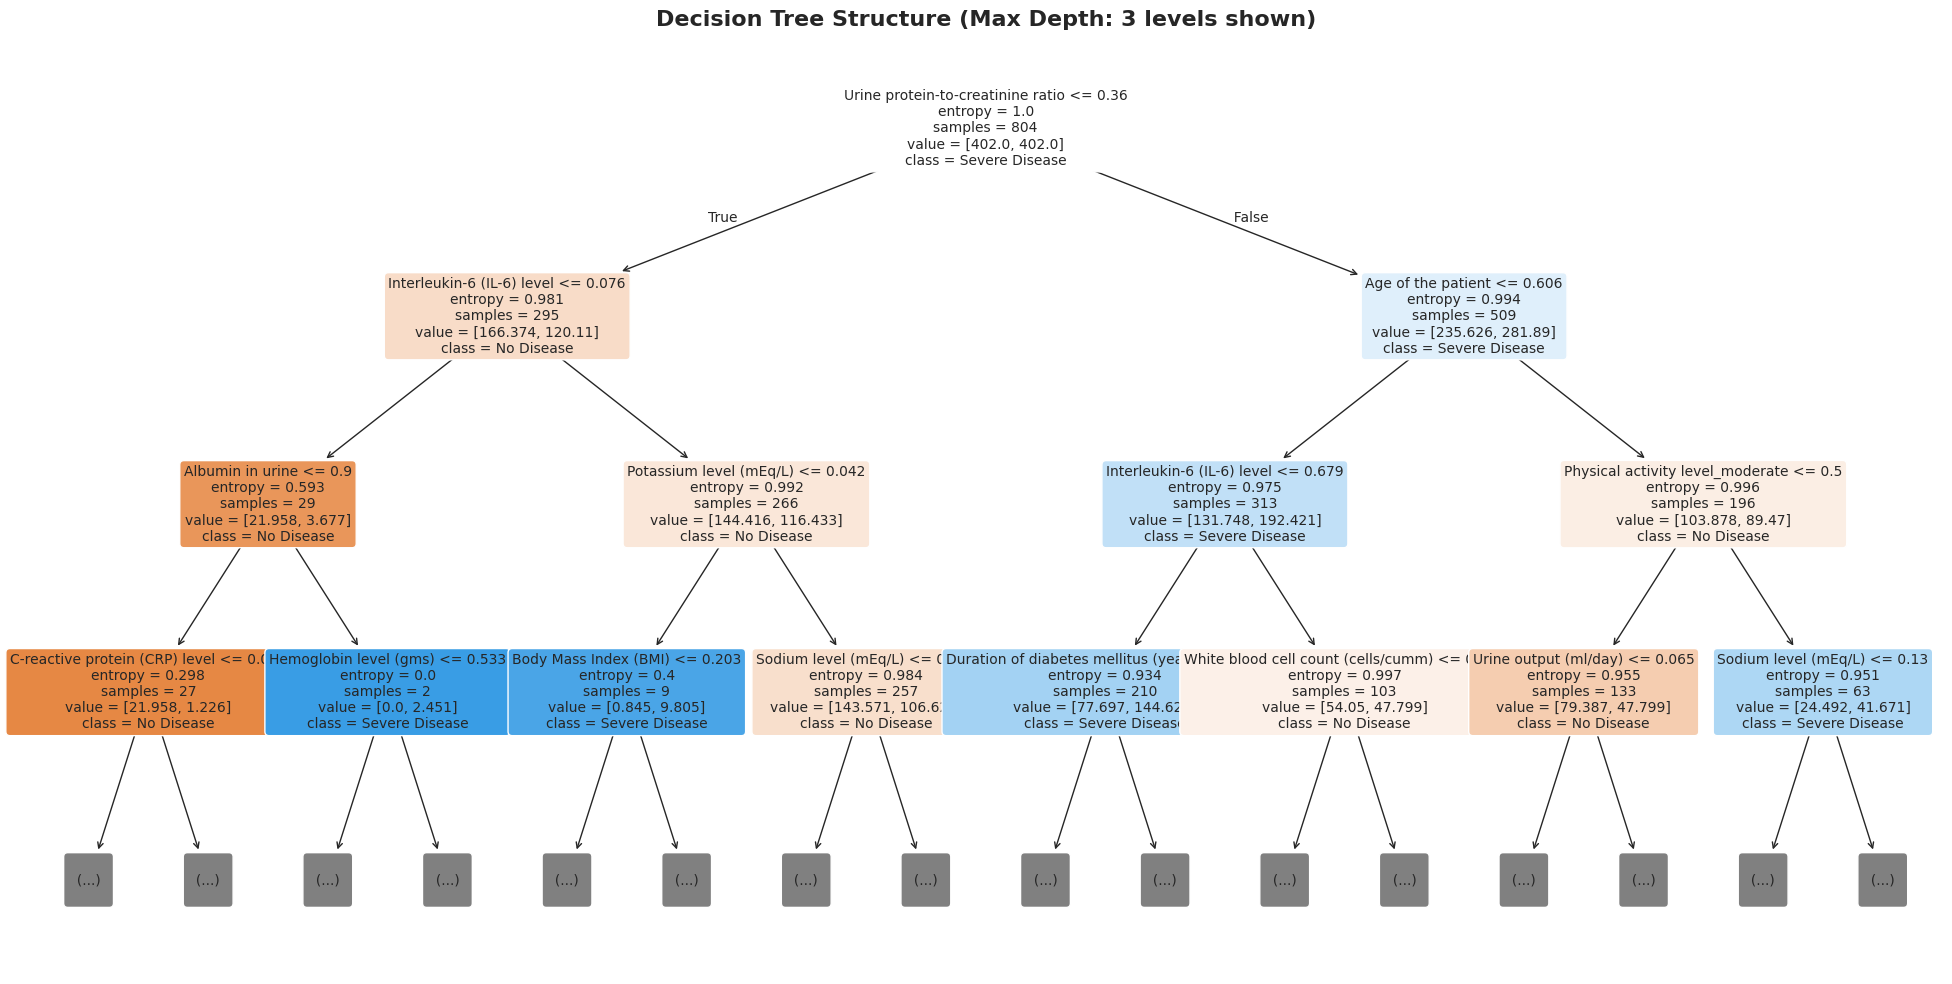

Total tree depth: 5
Total number of leaves: 23


In [53]:
# Visualize the Decision Tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt,
          feature_names=X.columns,
          class_names=['No Disease', 'Severe Disease'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Show only first 3 levels for clarity
plt.title('Decision Tree Structure (Max Depth: 3 levels shown)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Total tree depth: {best_dt.get_depth()}")
print(f"Total number of leaves: {best_dt.get_n_leaves()}")

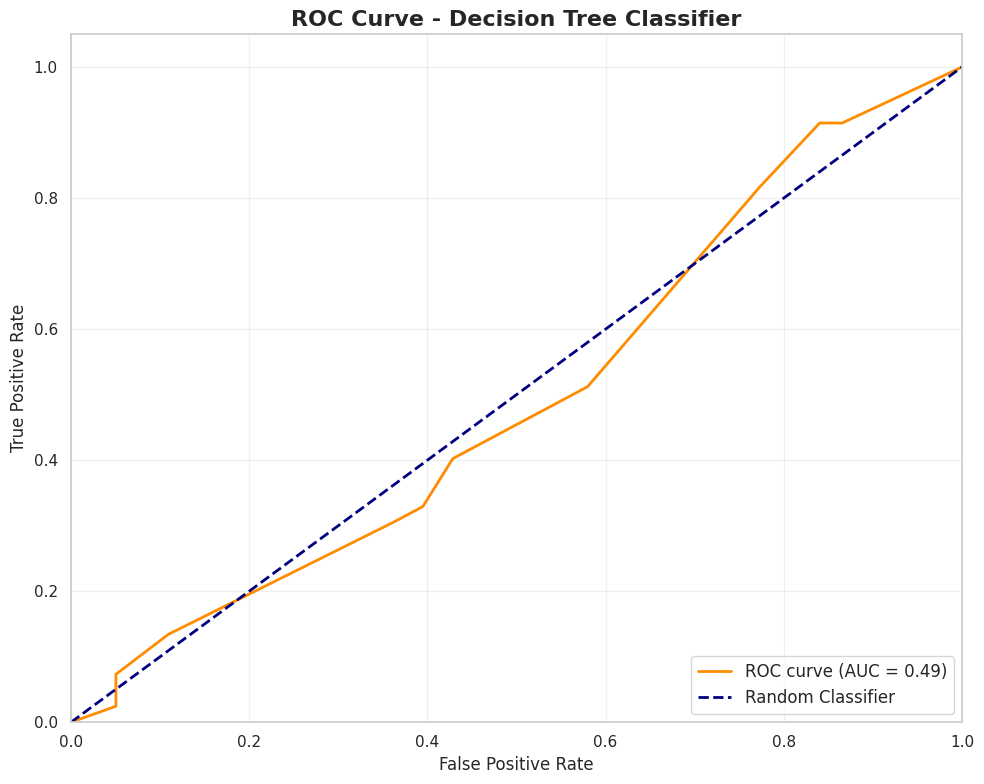

AUC Score: 0.4926


In [54]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get prediction probabilities
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Decision Tree Classifier', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

# Decision Tree Classifier - Summary
- **Task:** Classify Chronic Kidney Disease (Severe vs No Disease)
- **Model:** Decision Tree with RandomizedSearchCV (hyperparameter tuning)
- **Tuning Metric:** F1-score (better for imbalanced/medical data)
- **Other Metric:** Accuracy

## Results (Best Model)
- **Accuracy:** *(0.5025)*
- **F1-score:** *(0.3976)*
- **Precision:** *(0.3929)*
- **Recall:** *(0.4024)*
- **AUC:** *(0.4926)*

## Why F1-score?
- F1 balances precision and recall, important for medical tasks where both false positives and false negatives matter.
- Accuracy alone can be misleading if classes are imbalanced.

## Why RandomizedSearchCV?
- Faster than GridSearchCV, still finds good parameters.
- Sufficient for practical model improvement.

## Key Points
- Decision Tree is interpretable and works well for mixed data.
- Hyperparameter tuning with F1-score improved model performance.
- Use F1 and accuracy to compare models quickly.

---